In [1]:
#### Cargamos las librerias ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

#metricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [2]:
#Cargando google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargar datos
datos = '/content/drive/MyDrive/05. Uniandes/05. Ciclo 05/01. No supervisado/00. Proyecto/01. Datos/SECOP-Contratos.csv'



df = pd.read_csv(datos, nrows=100000)

In [4]:
#iniciamos el descriptivo
descripcion=df.describe(include="all")
print(descripcion)
print(df.columns)

                                    Nombre Entidad   Nit Entidad  \
count                                       100000  1.000000e+05   
unique                                        2253           NaN   
top     Secretaría Distrital de Integración Social           NaN   
freq                                          2133           NaN   
mean                                           NaN  1.674539e+09   
std                                            NaN  2.384985e+09   
min                                            NaN  4.653184e+06   
25%                                            NaN  8.901020e+08   
50%                                            NaN  8.922800e+08   
75%                                            NaN  9.000350e+08   
max                                            NaN  9.015426e+09   

                      Departamento       Ciudad              Localización  \
count                       100000       100000                    100000   
unique                       

In [5]:
#Conociendo las columnas
df.shape
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 71 columns):
 #   Column                                                              Non-Null Count   Dtype 
---  ------                                                              --------------   ----- 
 0   Nombre Entidad                                                      100000 non-null  object
 1   Nit Entidad                                                         100000 non-null  int64 
 2   Departamento                                                        100000 non-null  object
 3   Ciudad                                                              100000 non-null  object
 4   Localización                                                        100000 non-null  object
 5   Orden                                                               100000 non-null  object
 6   Sector                                                              100000 non-null  object
 7   Rama        

In [6]:
# Creamos un nuevo dataset con columnas depuradas
dfD = df.loc[:, ~df.columns.isin(['Nombre Entidad','Nit Entidad','Ciudad','Localización','Anno BPIN','ID Contrato','Fecha Inicio Liquidacion','Fecha de Firma','Reversion','Proceso de Compra','Referencia del Contrato','Codigo de Categoria Principal','Descripcion del Proceso','TipoDocProveedor','Codigo Proveedor','Documento Proveedor','Proveedor Adjudicado','Nombre Representante Legal','Nacionalidad Representante Legal','Tipo de Identificación Representante Legal','Identificación Representante Legal','Género Representante Legal','URLProceso','Puntos del Acuerdo','Fecha Fin Liquidacion','Pilares del Acuerdo','Condiciones de Entrega','Estado BPIN','Código BPIN','Codigo Entidad','Obligación Ambiental','Obligaciones Postconsumo','Justificacion Modalidad de Contratacion','Saldo CDP','Saldo Vigencia','EsPostConflicto','Presupuesto General de la Nacion – PGN','Sistema General de Participaciones','Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)','Recursos de Credito','Recursos Propios','Ultima Actualizacion','Valor Amortizado','Origen de los Recursos','Entidad Centralizada', 'Objeto del Contrato'])]
dfD.shape
dfD.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Departamento                     100000 non-null  object
 1   Orden                            100000 non-null  object
 2   Sector                           100000 non-null  object
 3   Rama                             100000 non-null  object
 4   Estado Contrato                  100000 non-null  object
 5   Tipo de Contrato                 100000 non-null  object
 6   Modalidad de Contratacion        100000 non-null  object
 7   Fecha de Inicio del Contrato     91316 non-null   object
 8   Fecha de Fin del Contrato        98863 non-null   object
 9   Fecha de Inicio de Ejecucion     15812 non-null   object
 10  Fecha de Fin de Ejecucion        15994 non-null   object
 11  Es Grupo                         100000 non-null  object
 12  Es Pyme          

In [7]:
dfD.head()

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Fecha de Inicio del Contrato,Fecha de Fin del Contrato,Fecha de Inicio de Ejecucion,...,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados
0,Norte de Santander,Territorial,Servicio Público,Ejecutivo,Modificado,Prestación de servicios,Contratación directa,02/01/2022,06/30/2022,NaN,...,No,8000000,0,8000000,3200000,4800000,0,8000000,Inversión,0
1,Nariño,Nacional,Trabajo,Ejecutivo,Modificado,Prestación de servicios,Contratación directa,02/10/2020,12/11/2020,02/10/2020,...,No,34730000,0,34723675,1265000,33465000,0,34730000,Inversión,5
2,Meta,Territorial,Ambiente y Desarrollo Sostenible,Ejecutivo,terminado,Prestación de servicios,Contratación directa,01/18/2018,12/17/2018,01/18/2018,...,Si,19241739,0,0,19241739,0,0,4618017,Inversión,0
3,Distrito Capital de Bogotá,Nacional,Ambiente y Desarrollo Sostenible,Corporación Autónoma,Borrador,Prestación de servicios,Contratación directa,NaN,12/27/2023,NaN,...,No,0,0,0,0,0,0,0,Inversión,0
4,Santander,Territorial,Servicio Público,Ejecutivo,Activo,Prestación de servicios,Contratación directa,02/21/2019,05/20/2019,02/21/2019,...,No,11700000,0,0,11700000,0,0,11700000,Inversión,0


In [8]:
# Validamos valores nulos
dfD.isna().any()

Departamento                       False
Orden                              False
Sector                             False
Rama                               False
Estado Contrato                    False
Tipo de Contrato                   False
Modalidad de Contratacion          False
Fecha de Inicio del Contrato        True
Fecha de Fin del Contrato           True
Fecha de Inicio de Ejecucion        True
Fecha de Fin de Ejecucion           True
Es Grupo                           False
Es Pyme                            False
Habilita Pago Adelantado           False
Liquidación                        False
Valor del Contrato                 False
Valor de pago adelantado           False
Valor Facturado                    False
Valor Pendiente de Pago            False
Valor Pagado                       False
Valor Pendiente de Amortizacion    False
Valor Pendiente de Ejecucion       False
Destino Gasto                      False
Dias Adicionados                   False
dtype: bool

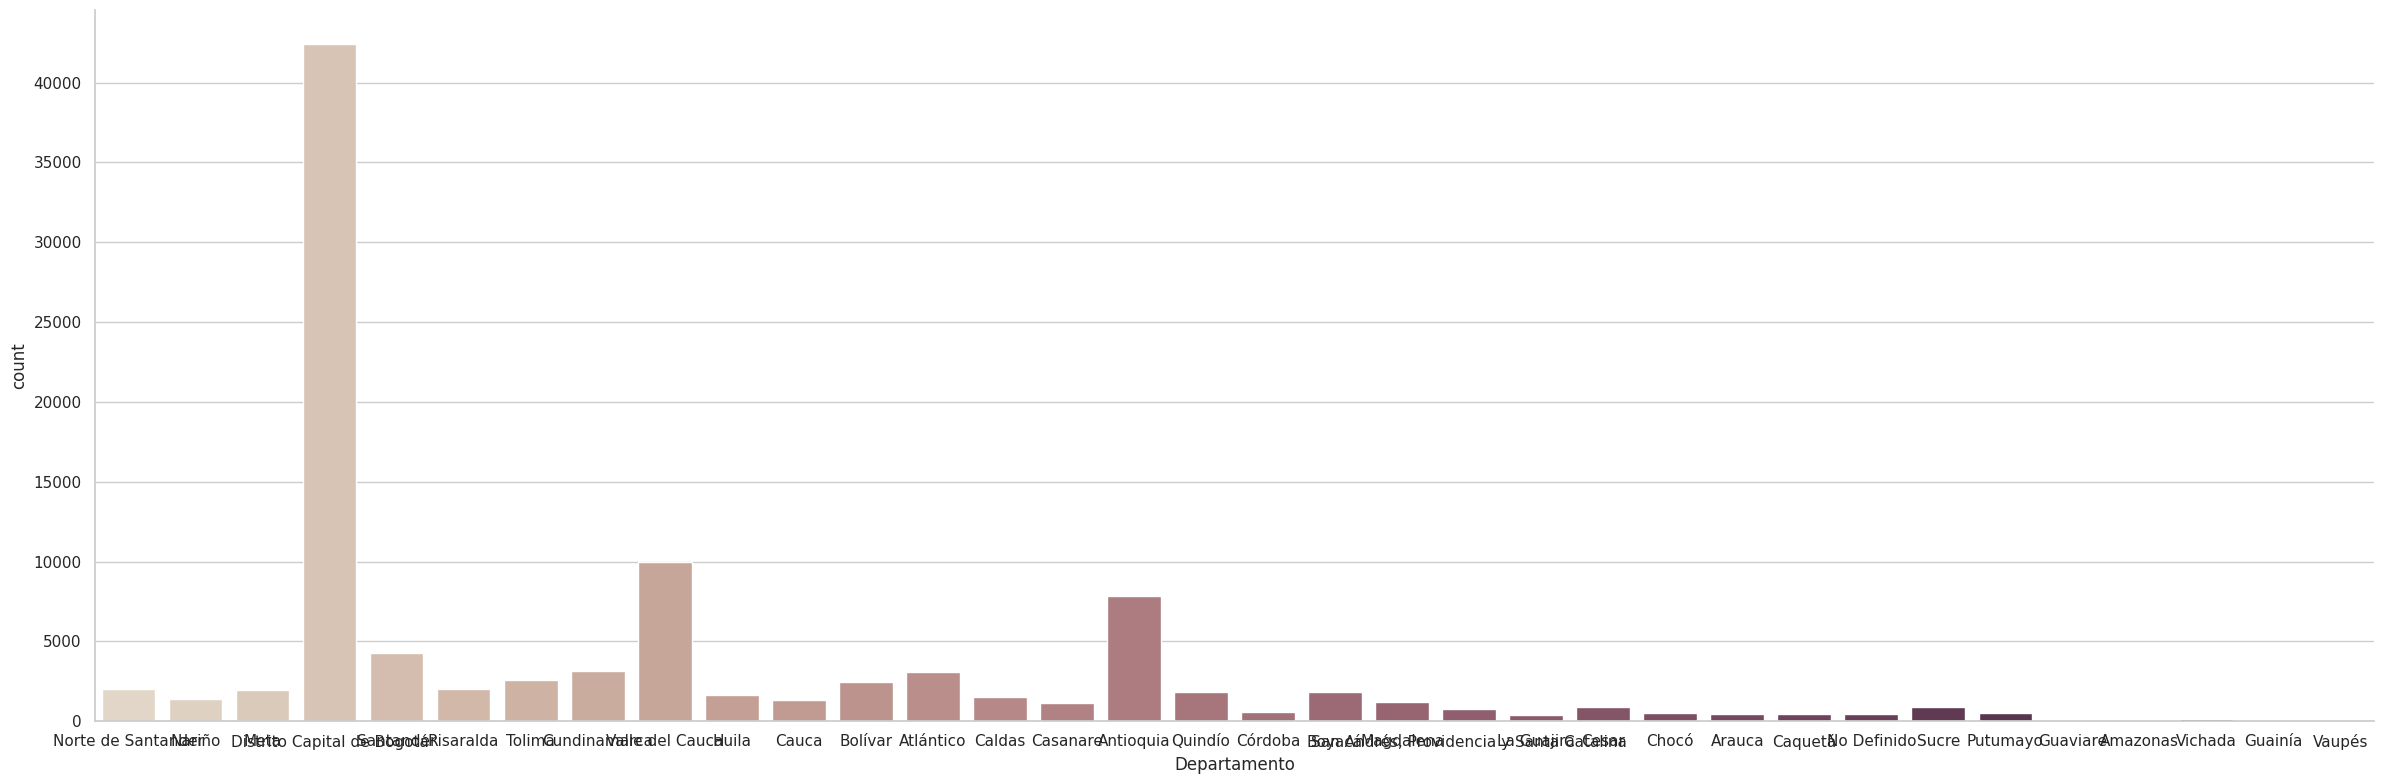

In [9]:
#análisis por departamento
sns.set(style="whitegrid")
sns.catplot(x="Departamento", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [10]:
dfDep = dfD[['Departamento','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfDep.groupby(['Departamento']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Departamento,,,,
Amazonas,"4,837,482,400.00$","1,060,399,920.00$","890,935,270.00$",0.00$
Antioquia,"1,479,669,482,123.00$","512,141,694,640.00$","464,236,636,606.00$","618,167,744.00$"
Arauca,"22,505,312,494.00$","6,221,797,461.00$","5,823,435,255.00$","64,114,568.00$"
Atlántico,"969,846,328,674.00$","124,392,527,438.00$","35,007,638,473.00$","670,556,007.00$"
Bolívar,"581,895,341,187.00$","51,537,649,902.00$","34,400,286,440.00$","493,989,727.00$"
Boyacá,"185,093,005,539.00$","24,378,770,572.00$","22,053,361,955.00$","274,373,235.00$"
Caldas,"175,188,292,504.00$","11,534,352,724.00$","10,007,019,796.00$","634,617,388.00$"
Caquetá,"37,673,642,464.00$","12,352,764,821.00$","10,387,435,069.00$","225,000,371.00$"
Casanare,"76,793,306,502.00$","9,690,512,196.00$","7,551,779,381.00$","23,000,000.00$"


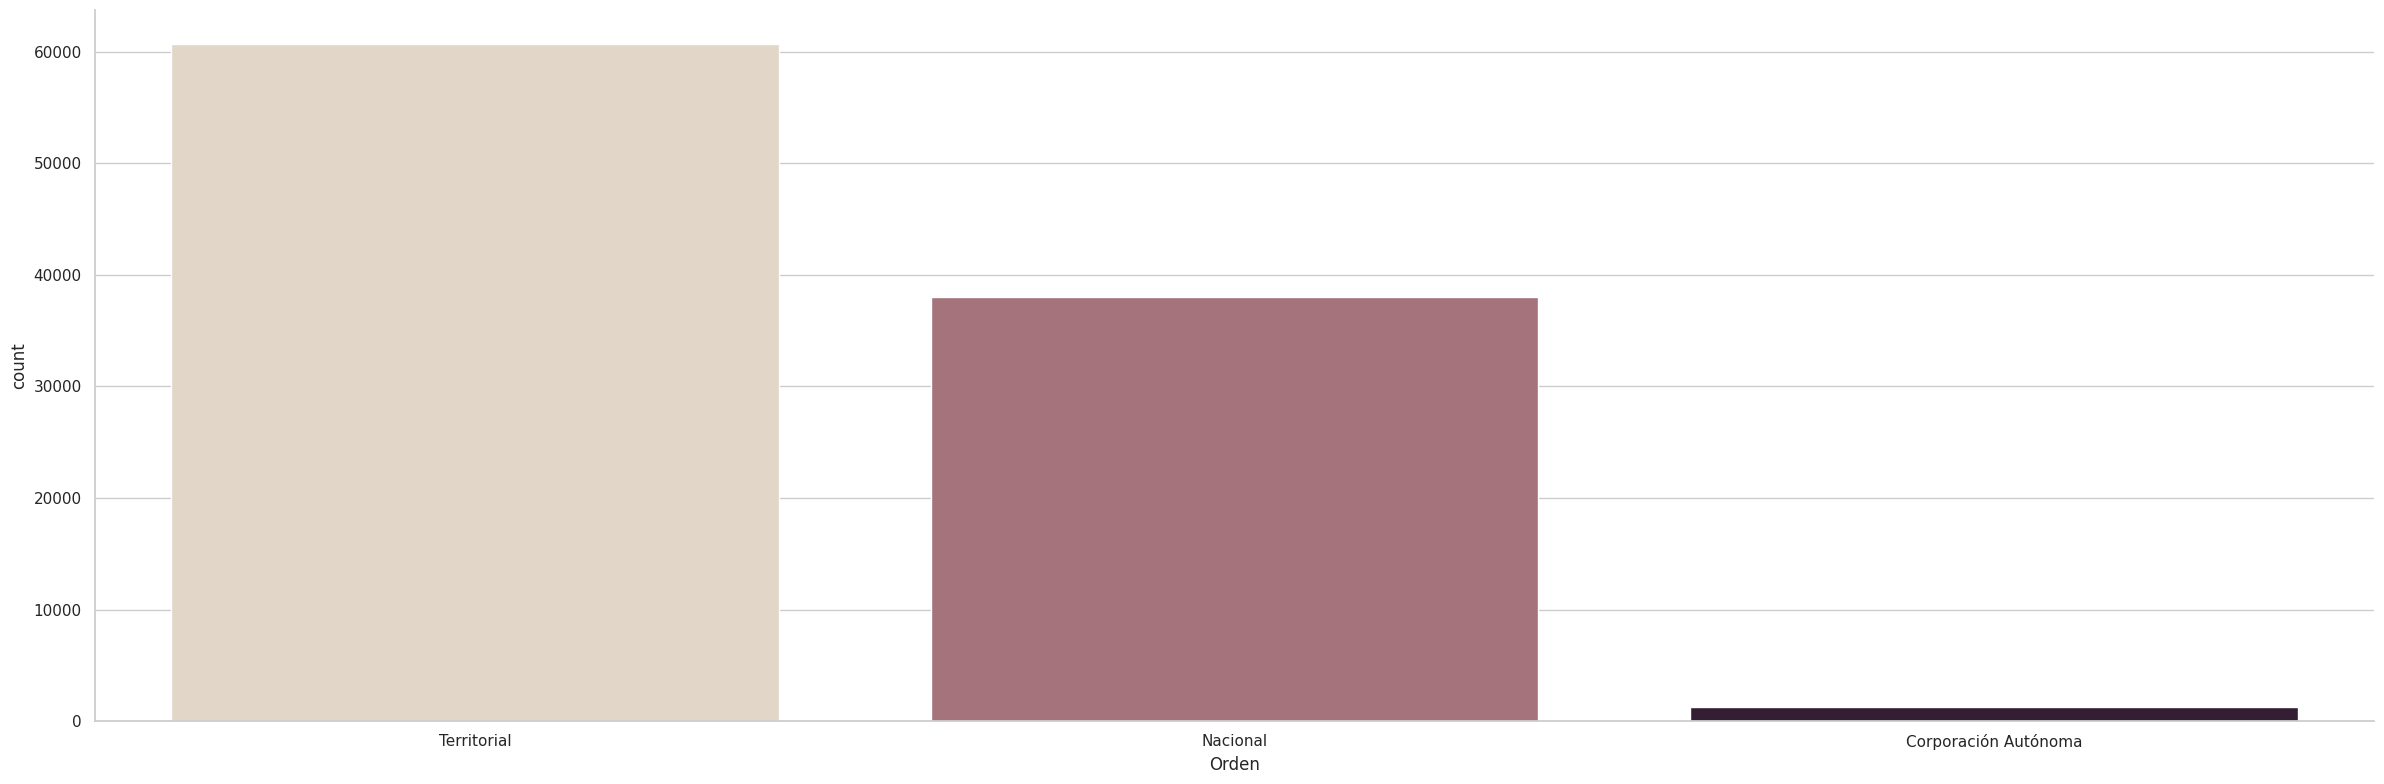

In [11]:
#análisis por estado de contrato
sns.set(style="whitegrid")
sns.catplot(x="Orden", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [12]:
dfOrd = dfD[['Orden','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfOrd.groupby(['Orden']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum") )

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Orden,,,,
Corporación Autónoma,162957414435,52148409780,42132098423,1062469435
Nacional,1714960633772792,1757562666582,1456312035856,14875946357
Territorial,2283079658926357,1672480731622,1333334226911,21118066125


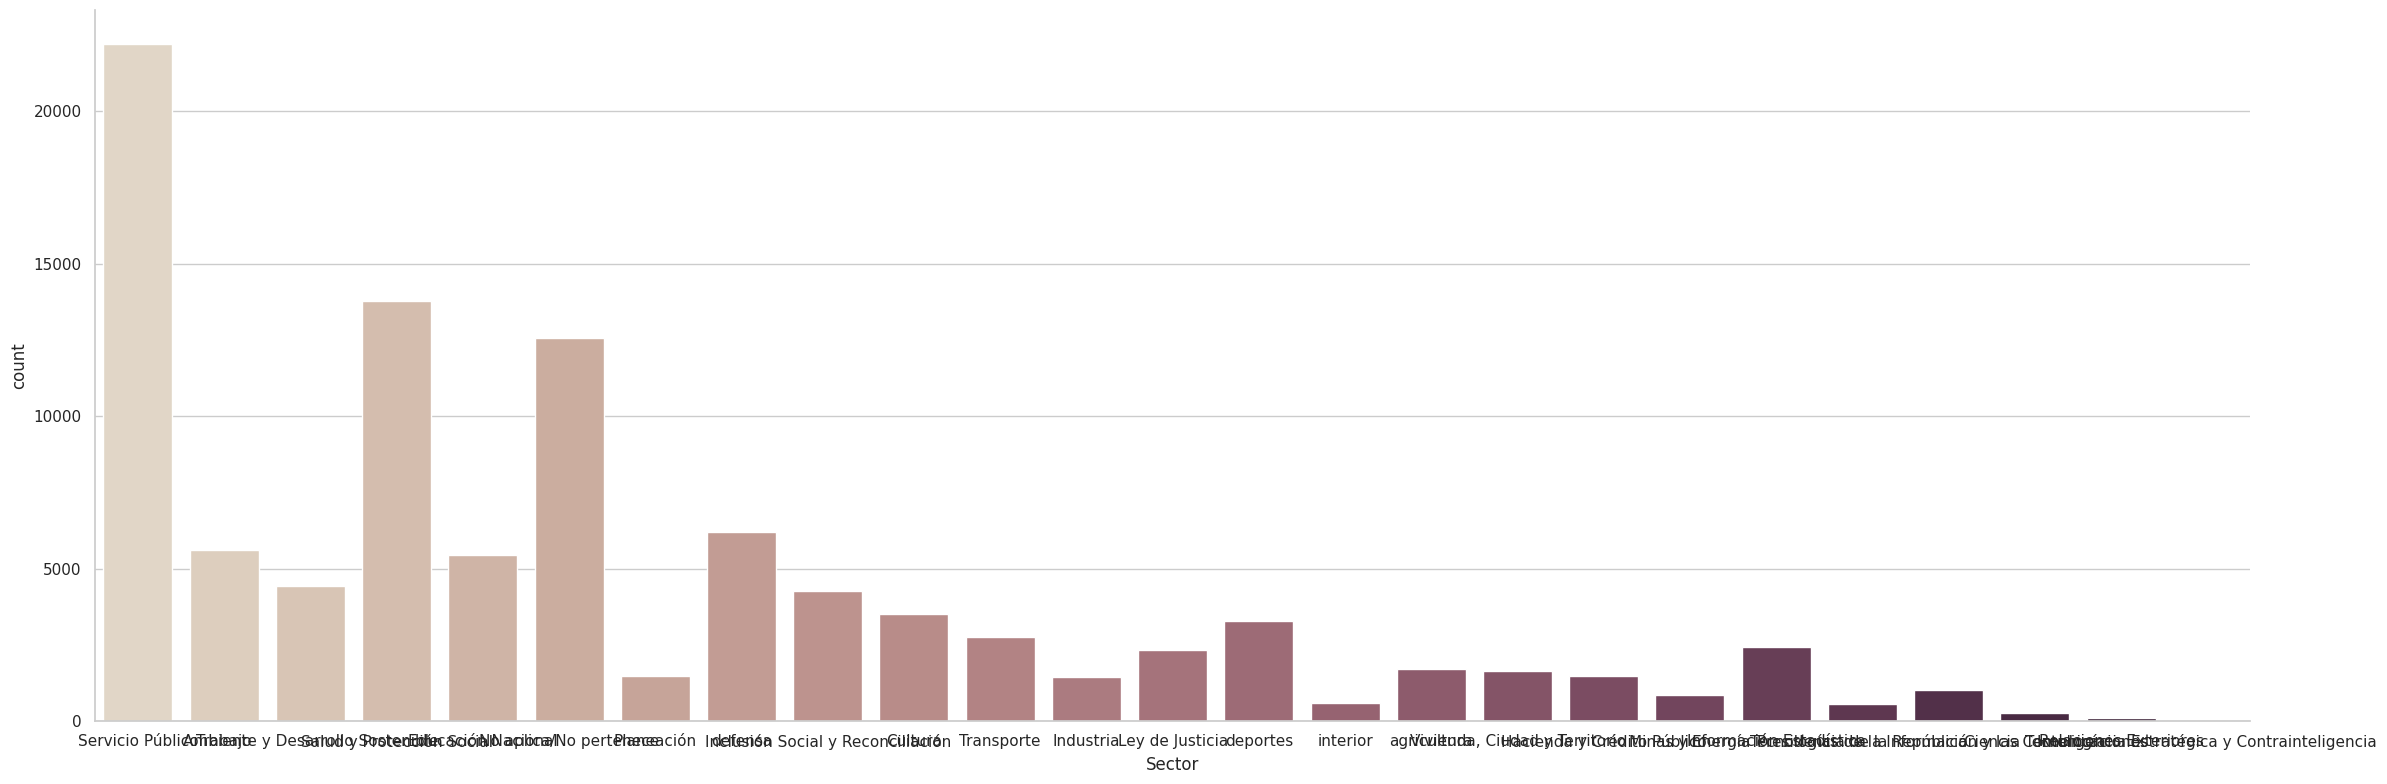

In [13]:
#análisis por estado de sector
sns.set(style="whitegrid")
sns.catplot(x="Sector", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [14]:
dfSec = dfD[['Sector','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfSec.groupby(['Sector']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Sector,,,,
Ambiente y Desarrollo Sostenible,"991,774,915,743.00$","83,998,204,307.00$","55,203,847,249.00$","1,093,732,905.00$"
Ciencia Tecnología,"64,807,169,419.00$","24,431,792,949.00$","19,197,717,055.00$","31,730,000.00$"
Cultura,"247,668,213,303.00$","70,495,898,978.00$","64,417,830,494.00$","1,230,978,871.00$"
Educación Nacional,"2,067,885,292,022,590.00$","102,428,022,402.00$","77,159,396,680.00$","104,844,463.00$"
Hacienda y Crédito Público,"26,414,404,891,674.00$","53,401,053,881.00$","48,941,731,049.00$",0.00$
Inclusión Social y Reconciliación,"825,722,612,711.00$","76,417,771,941.00$","51,732,112,804.00$","505,136,904.00$"
Industria,"226,420,369,997.00$","41,880,050,263.00$","37,497,430,137.00$","5,068,103.00$"
Información Estadística,"1,705,750,491,968,886.00$","12,776,129,526.00$","5,502,553,367.00$",0.00$
Inteligencia Estratégica y Contrainteligencia,"176,895,807.00$",0.00$,0.00$,0.00$


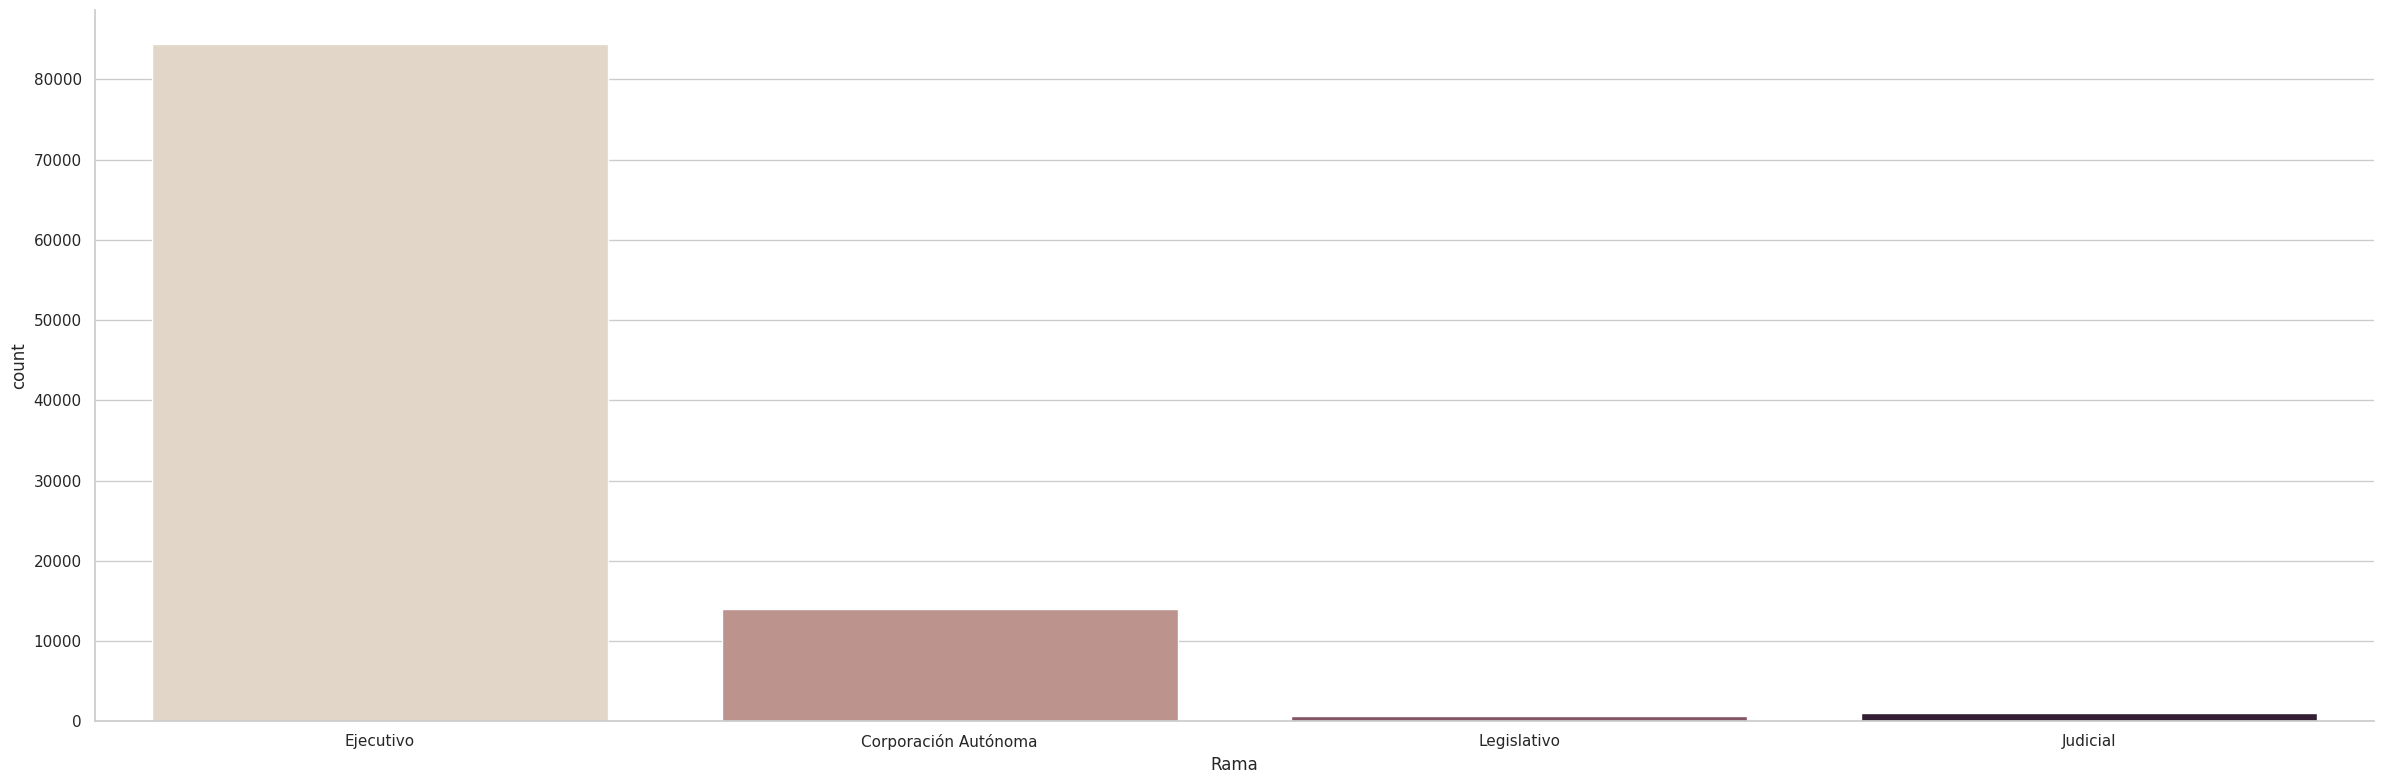

In [15]:
#análisis por estado de sector
sns.set(style="whitegrid")
sns.catplot(x="Rama", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [16]:
dfRam = dfD[['Rama','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfRam.groupby(['Rama']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Rama,,,,
Corporación Autónoma,"30,567,454,860,677.00$","334,805,102,026.00$","273,368,911,753.00$","2,140,491,760.00$"
Ejecutivo,"3,967,439,825,715,159.00$","3,094,329,957,763.00$","2,531,124,860,139.00$","34,913,805,005.00$"
Judicial,"162,113,420,567.00$","45,602,700,487.00$","22,476,045,918.00$","2,185,152.00$"
Legislativo,"33,856,117,181.00$","7,454,047,708.00$","4,808,543,380.00$",0.00$


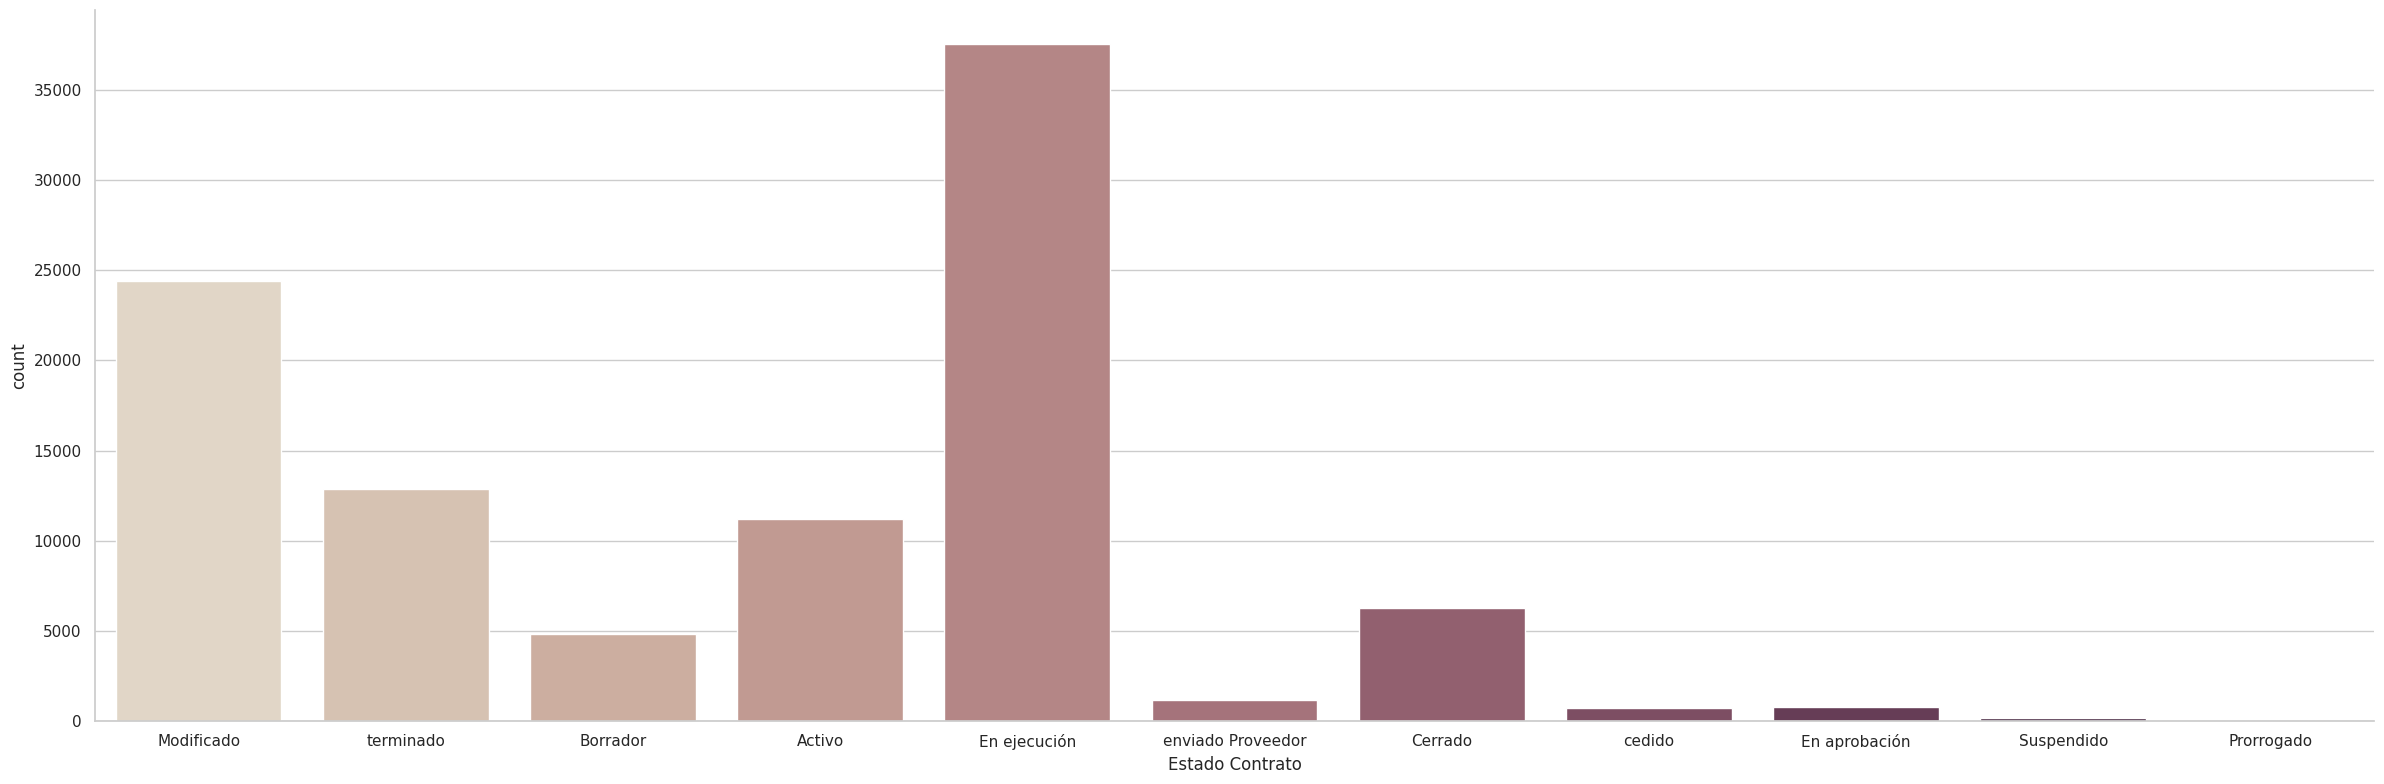

In [17]:
#análisis por estado contrato
sns.set(style="whitegrid")
sns.catplot(x="Estado Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [18]:
dfSec = dfD[['Estado Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Estado Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Estado Contrato,,,,,
Activo,"1,563,387,510,868.00$","101,496,600,822.00$","82,011,275,600.00$","1,480,456,991,425.00$","8,009,572,776.00$"
Borrador,"3,981,199,902,813,585.00$","19,000,000.00$","19,000,000.00$","1,330,920,036,927.00$","1,929,197,551.00$"
Cerrado,"365,567,340,862.00$","147,345,085,066.00$","147,285,609,289.00$","849,616,943,396.00$","13,470,000.00$"
En aprobación,"49,156,414,817.00$","9,474,000.00$","6,700,000.00$","48,819,776,615.00$","138,397,382.00$"
En ejecución,"4,219,978,804,544.00$","532,910,548,759.00$","369,503,099,441.00$","3,846,065,221,313.00$","2,274,197,374.00$"
Modificado,"8,135,301,825,827.00$","2,044,291,386,860.00$","1,665,446,540,041.00$","6,568,310,905,233.00$","14,841,711,277.00$"
Prorrogado,"97,121,352.00$","12,000,000.00$","10,000,000.00$","87,121,352.00$",0.00$
Suspendido,"251,464,737,371.00$","36,789,877,548.00$","30,656,981,377.00$","220,810,155,986.00$","579,805,052.00$"
cedido,"28,550,933,640.00$","14,657,442,510.00$","11,091,682,325.00$","17,404,043,835.00$",0.00$


In [19]:
dfSec = dfD[['Estado Contrato','Valor del Contrato']]
dfSec.groupby(['Estado Contrato']).agg(Cantidad=("Valor del Contrato", "count")).style.format("{:,.2f}")

,Cantidad
Estado Contrato,
Activo,"11,189.00"
Borrador,"4,851.00"
Cerrado,"6,276.00"
En aprobación,813.00
En ejecución,"37,531.00"
Modificado,"24,411.00"
Prorrogado,6.00
Suspendido,160.00
cedido,725.00


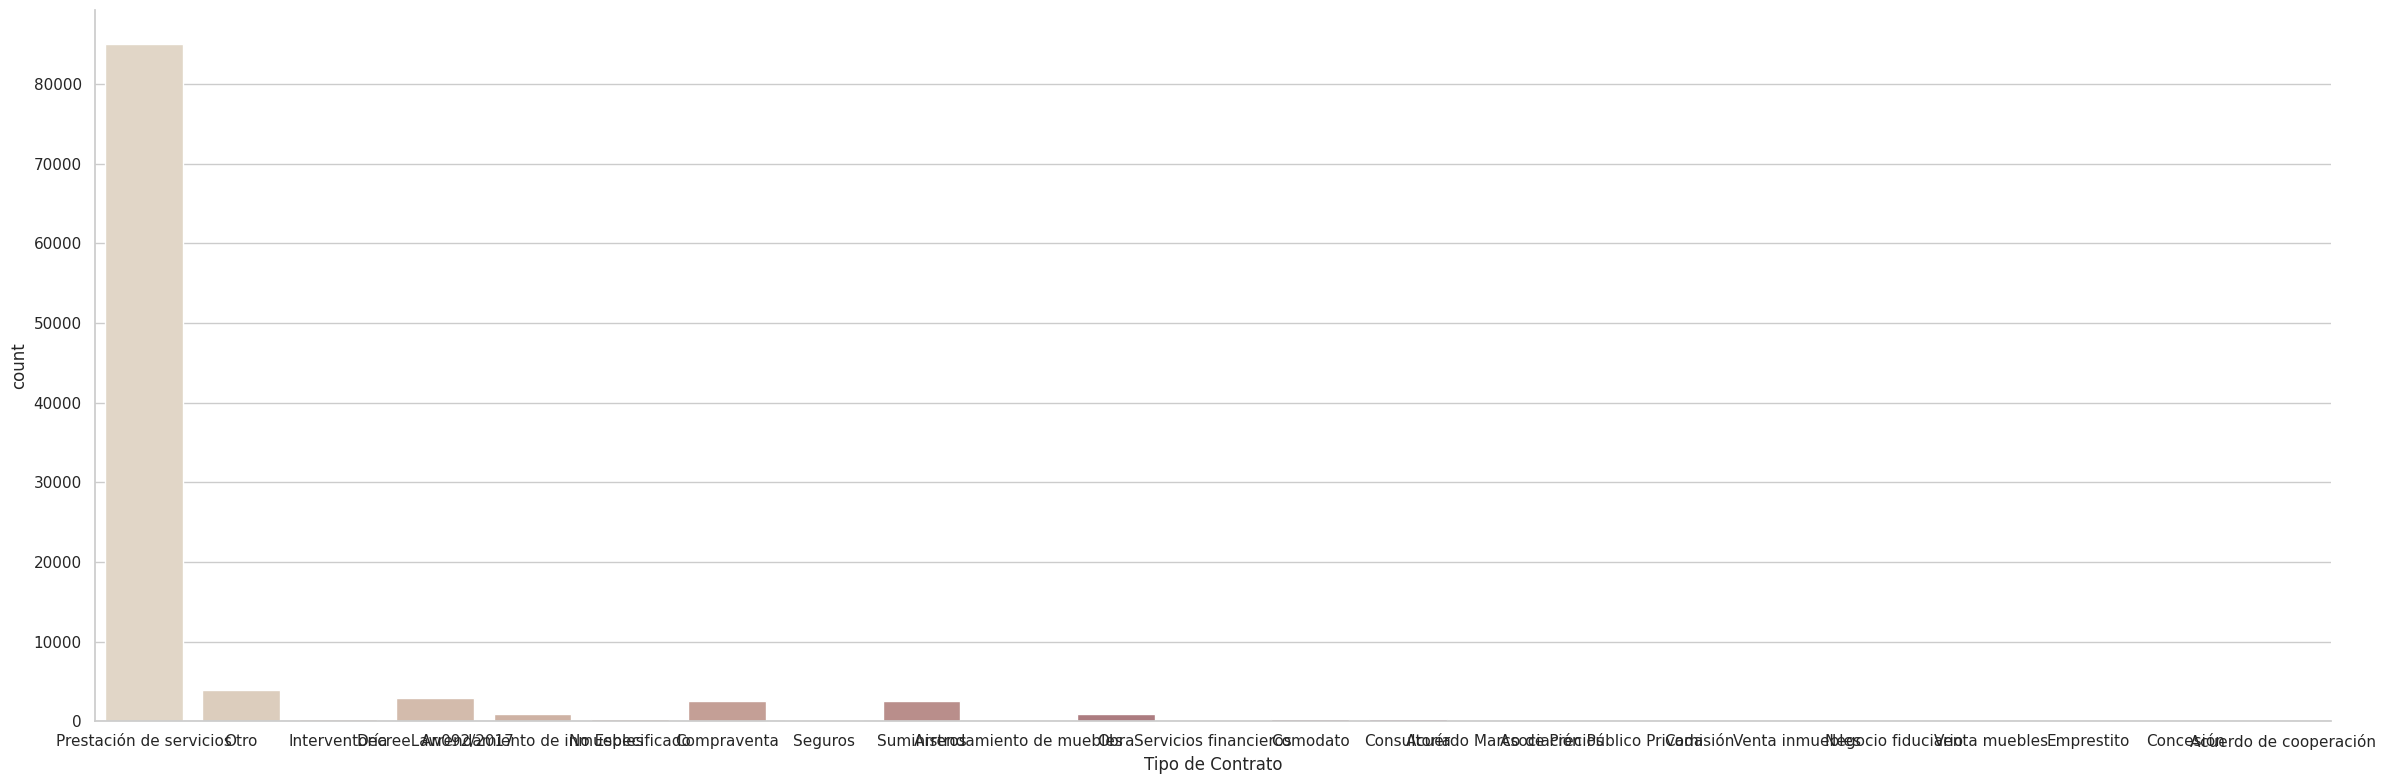

In [20]:
#análisis por tipo de contrato
sns.set(style="whitegrid")
sns.catplot(x="Tipo de Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [21]:
dfSec = dfD[['Tipo de Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Tipo de Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Tipo de Contrato,,,,,
Acuerdo Marco de Precios,"6,148,922,384.00$",0.00$,0.00$,"3,851,256,032.00$",0.00$
Acuerdo de cooperación,"2,395,730,000.00$",0.00$,0.00$,"2,395,730,000.00$",0.00$
Arrendamiento de inmuebles,"173,557,796,562.00$","35,213,847,234.00$","23,538,286,491.00$","149,890,029,433.00$",0.00$
Arrendamiento de muebles,"15,120,053,590.00$","3,496,918,841.00$","332,136,558.00$","14,787,917,032.00$",0.00$
Asociación Público Privada,"6,895,678,739.00$","38,728,000.00$","38,728,000.00$","6,856,950,739.00$","69,000,000.00$"
Comisión,"3,308,462,736.00$",0.00$,0.00$,"3,308,462,736.00$",0.00$
Comodato,"11,806,655,507.00$",0.00$,0.00$,"11,806,655,507.00$",0.00$
Compraventa,"492,097,836,323.00$","122,507,680,158.00$","89,996,302,764.00$","401,941,761,913.00$","1,382,429,583.00$"
Concesión,"1,922,102,806,379.00$","317,923,862,531.00$","317,923,862,531.00$","1,604,178,943,847.00$",0.00$


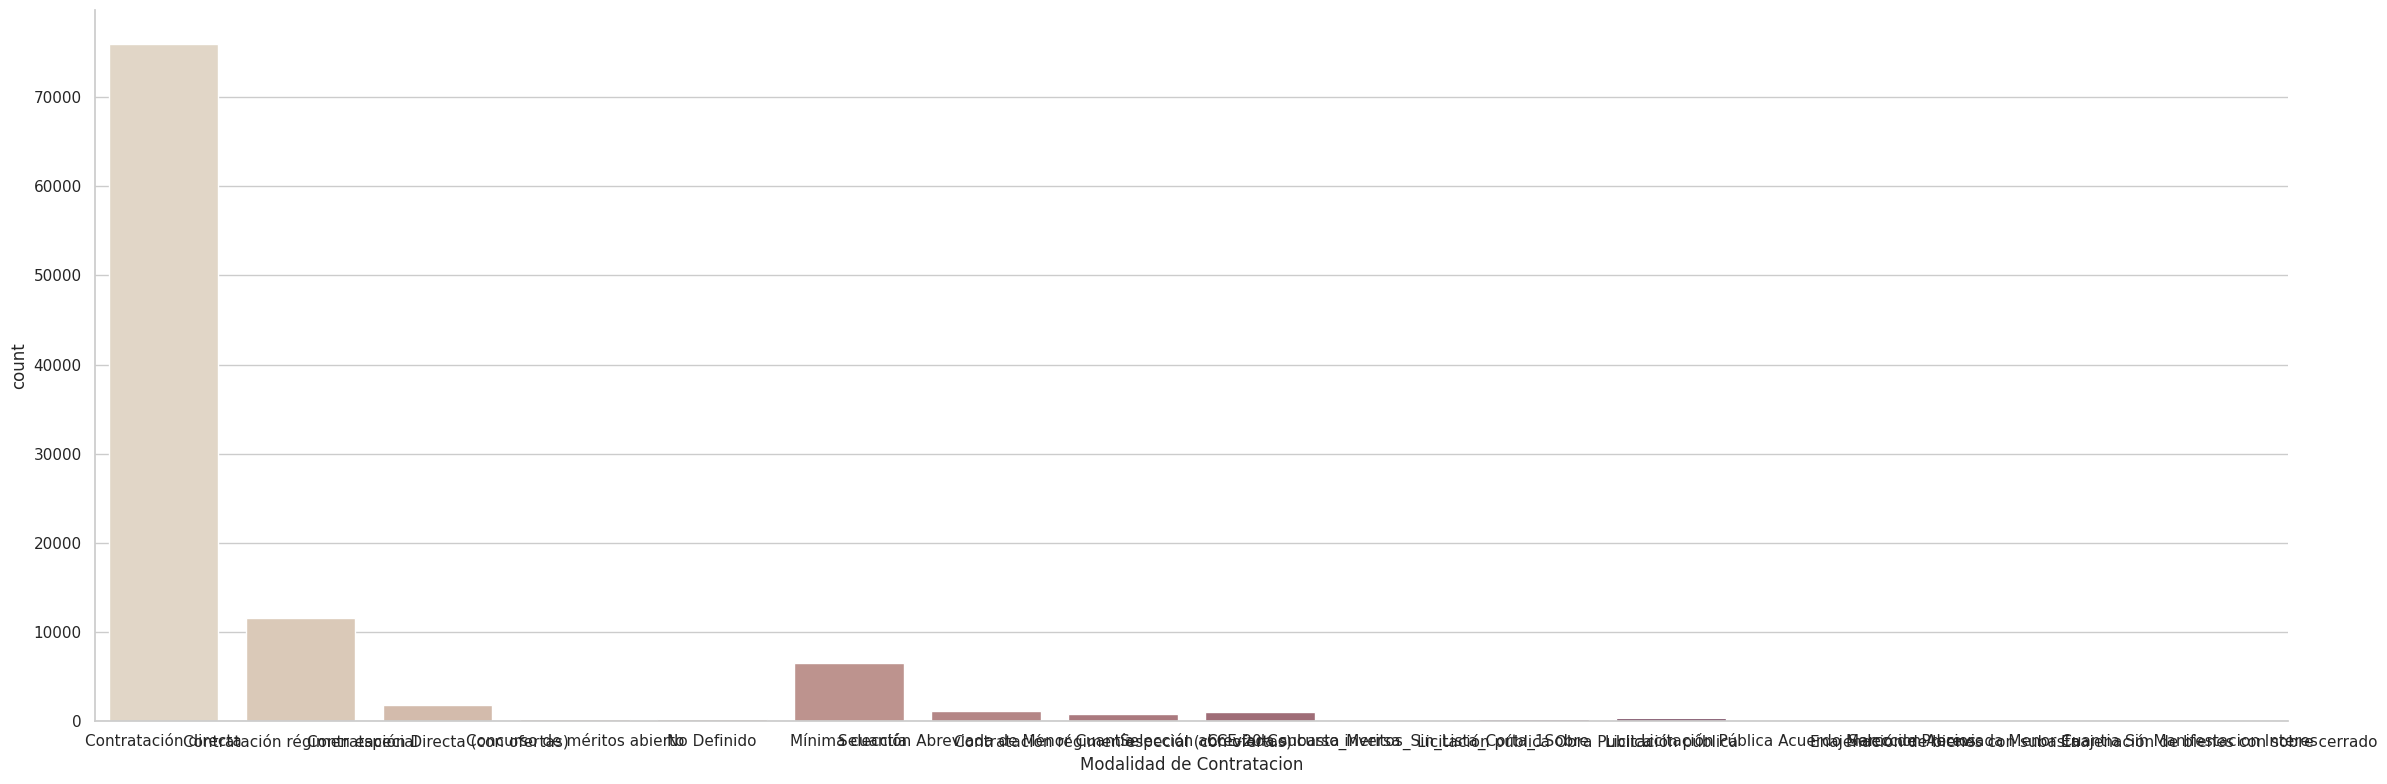

In [22]:
#análisis por modalidad de contratacion
sns.set(style="whitegrid")
sns.catplot(x="Modalidad de Contratacion", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [23]:
dfSec = dfD[['Modalidad de Contratacion','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Modalidad de Contratacion']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Modalidad de Contratacion,,,,,
CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre,"108,591,092,804.00$","8,571,002,668.00$","3,791,995,712.00$","104,799,097,089.00$","15,959,559.00$"
Concurso de méritos abierto,"325,690,637,812.00$","29,620,628,935.00$","24,253,893,977.00$","300,587,654,313.00$","734,755,612.00$"
Contratación Directa (con ofertas),"1,169,581,129,758.00$","272,420,612,109.00$","200,636,718,143.00$","972,540,801,019.00$","6,631,010,489.00$"
Contratación directa,"3,971,868,959,606,194.00$","1,155,280,356,424.00$","909,893,273,526.00$","5,311,756,090,395.00$","5,542,800,818.00$"
Contratación régimen especial,"16,180,061,793,293.00$","192,504,883,592.00$","170,167,919,261.00$","1,896,519,721,614.00$","2,832,650,299.00$"
Contratación régimen especial (con ofertas),"1,305,830,932,307.00$","100,099,519,972.00$","75,825,368,255.00$","1,861,301,844,539.00$","2,553,257,987.00$"
Enajenación de bienes con sobre cerrado,"15,104,117,953.00$",0.00$,0.00$,"15,104,117,953.00$",0.00$
Enajenación de bienes con subasta,"298,699,219.00$",0.00$,0.00$,"298,699,219.00$",0.00$
Licitación Pública Acuerdo Marco de Precios,"6,148,922,384.00$",0.00$,0.00$,"3,851,256,032.00$",0.00$


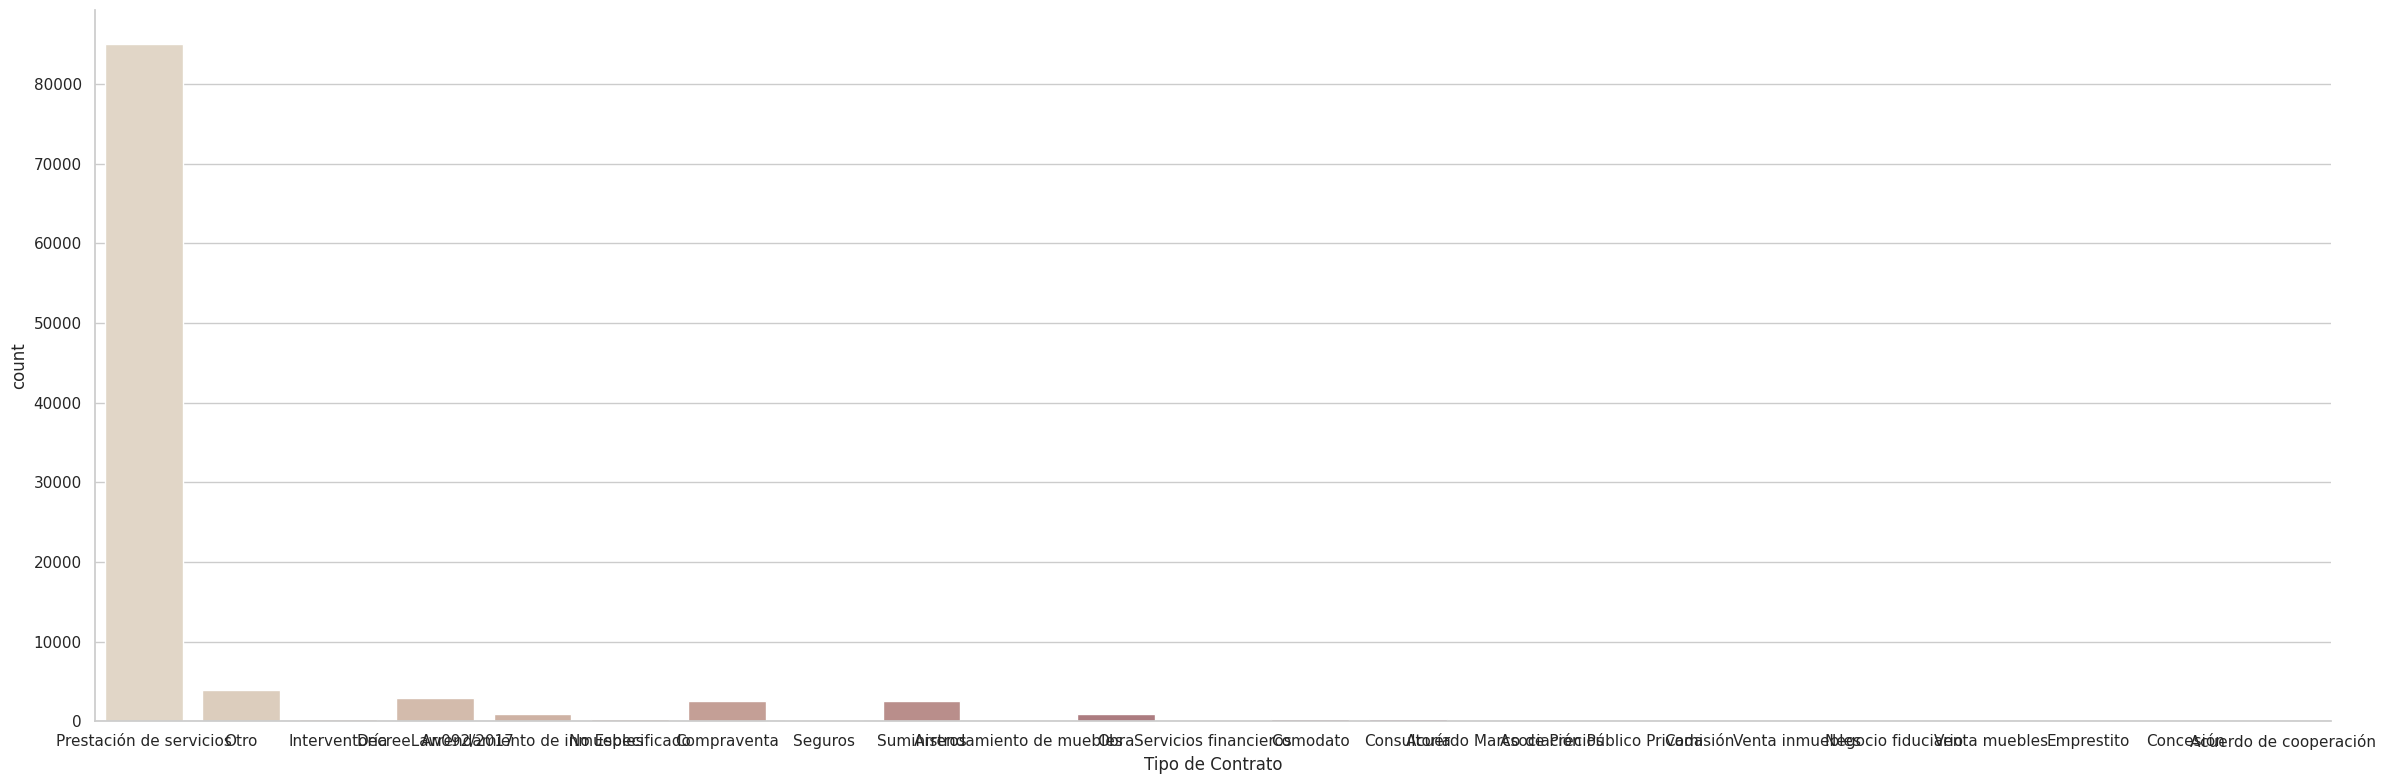

In [24]:
#análisis por estado de rama
sns.set(style="whitegrid")
sns.catplot(x="Tipo de Contrato", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [25]:
dfSec = dfD[['Tipo de Contrato','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Tipo de Contrato']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Tipo de Contrato,,,,,
Acuerdo Marco de Precios,"6,148,922,384.00$",0.00$,0.00$,"3,851,256,032.00$",0.00$
Acuerdo de cooperación,"2,395,730,000.00$",0.00$,0.00$,"2,395,730,000.00$",0.00$
Arrendamiento de inmuebles,"173,557,796,562.00$","35,213,847,234.00$","23,538,286,491.00$","149,890,029,433.00$",0.00$
Arrendamiento de muebles,"15,120,053,590.00$","3,496,918,841.00$","332,136,558.00$","14,787,917,032.00$",0.00$
Asociación Público Privada,"6,895,678,739.00$","38,728,000.00$","38,728,000.00$","6,856,950,739.00$","69,000,000.00$"
Comisión,"3,308,462,736.00$",0.00$,0.00$,"3,308,462,736.00$",0.00$
Comodato,"11,806,655,507.00$",0.00$,0.00$,"11,806,655,507.00$",0.00$
Compraventa,"492,097,836,323.00$","122,507,680,158.00$","89,996,302,764.00$","401,941,761,913.00$","1,382,429,583.00$"
Concesión,"1,922,102,806,379.00$","317,923,862,531.00$","317,923,862,531.00$","1,604,178,943,847.00$",0.00$


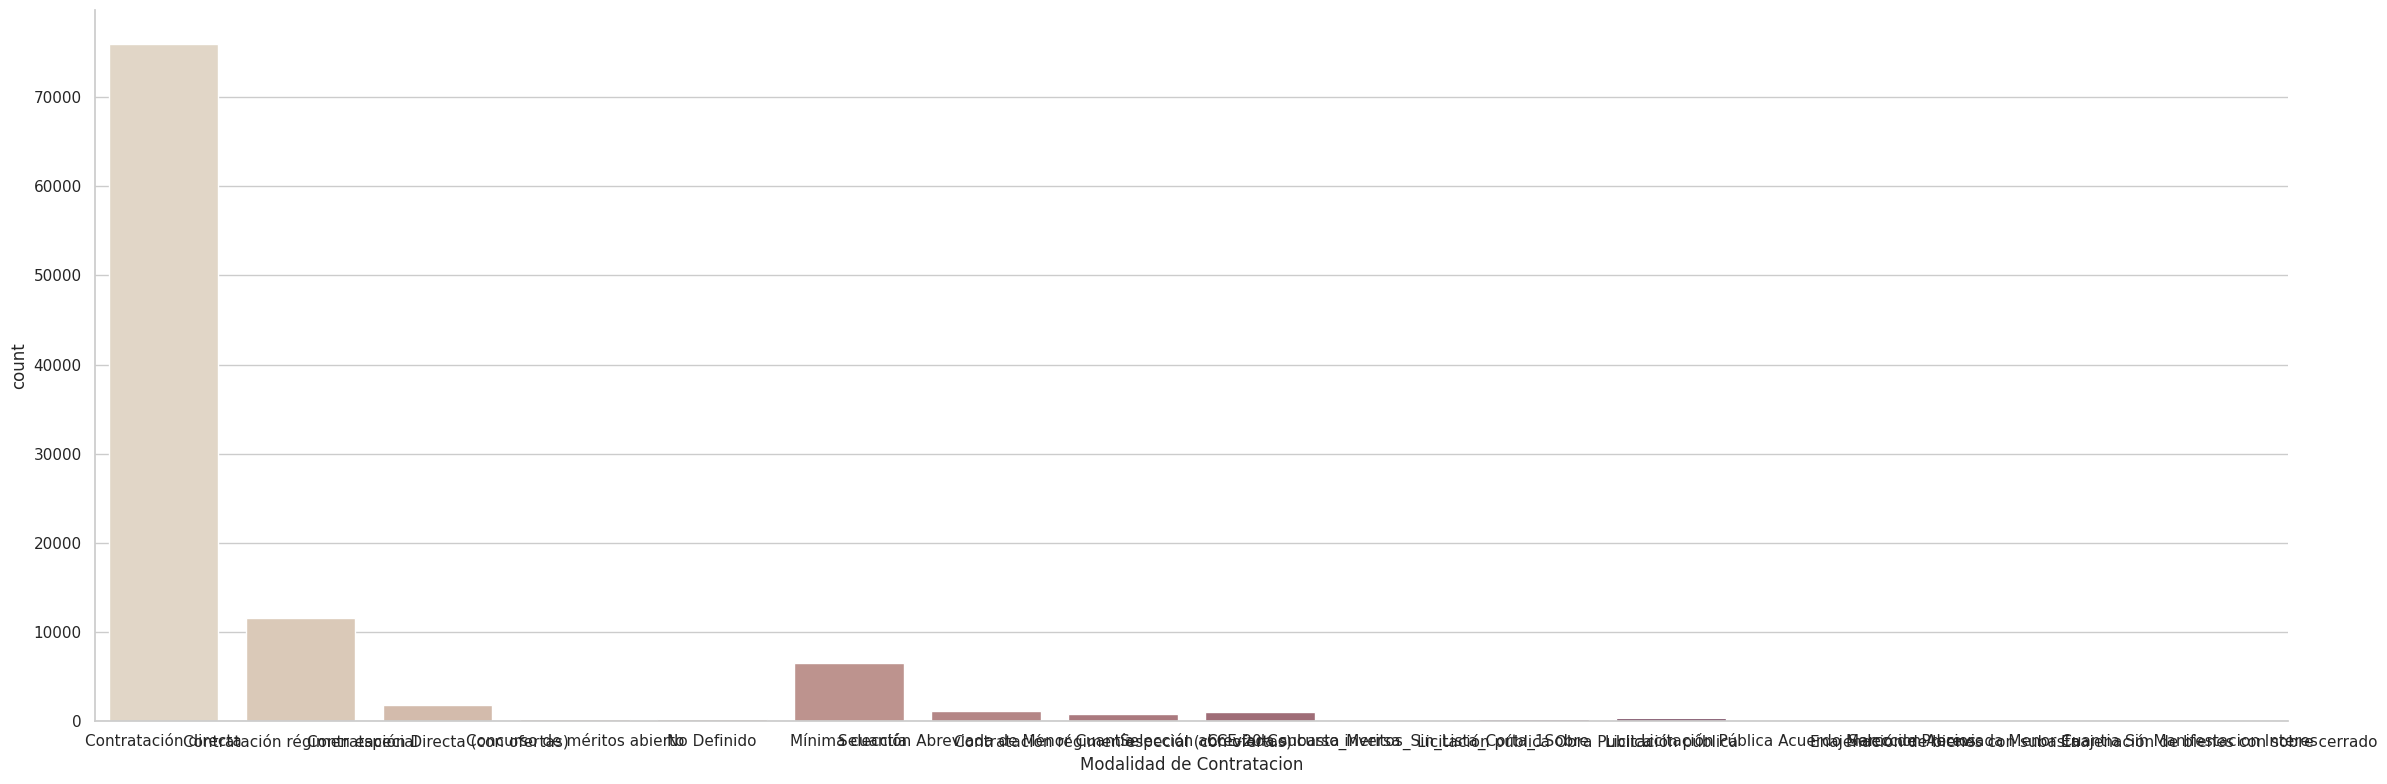

In [26]:
#análisis por modalidad de contratacion
sns.set(style="whitegrid")
sns.catplot(x="Modalidad de Contratacion", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [27]:
dfMoC = dfD[['Modalidad de Contratacion','Valor del Contrato','Valor Facturado','Valor Pagado','Valor de pago adelantado']]
dfMoC.groupby(['Modalidad de Contratacion']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrAdelantado
Modalidad de Contratacion,,,,
CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre,"108,591,092,804.00$","8,571,002,668.00$","3,791,995,712.00$","15,959,559.00$"
Concurso de méritos abierto,"325,690,637,812.00$","29,620,628,935.00$","24,253,893,977.00$","734,755,612.00$"
Contratación Directa (con ofertas),"1,169,581,129,758.00$","272,420,612,109.00$","200,636,718,143.00$","6,631,010,489.00$"
Contratación directa,"3,971,868,959,606,194.00$","1,155,280,356,424.00$","909,893,273,526.00$","5,542,800,818.00$"
Contratación régimen especial,"16,180,061,793,293.00$","192,504,883,592.00$","170,167,919,261.00$","2,832,650,299.00$"
Contratación régimen especial (con ofertas),"1,305,830,932,307.00$","100,099,519,972.00$","75,825,368,255.00$","2,553,257,987.00$"
Enajenación de bienes con sobre cerrado,"15,104,117,953.00$",0.00$,0.00$,0.00$
Enajenación de bienes con subasta,"298,699,219.00$",0.00$,0.00$,0.00$
Licitación Pública Acuerdo Marco de Precios,"6,148,922,384.00$",0.00$,0.00$,0.00$


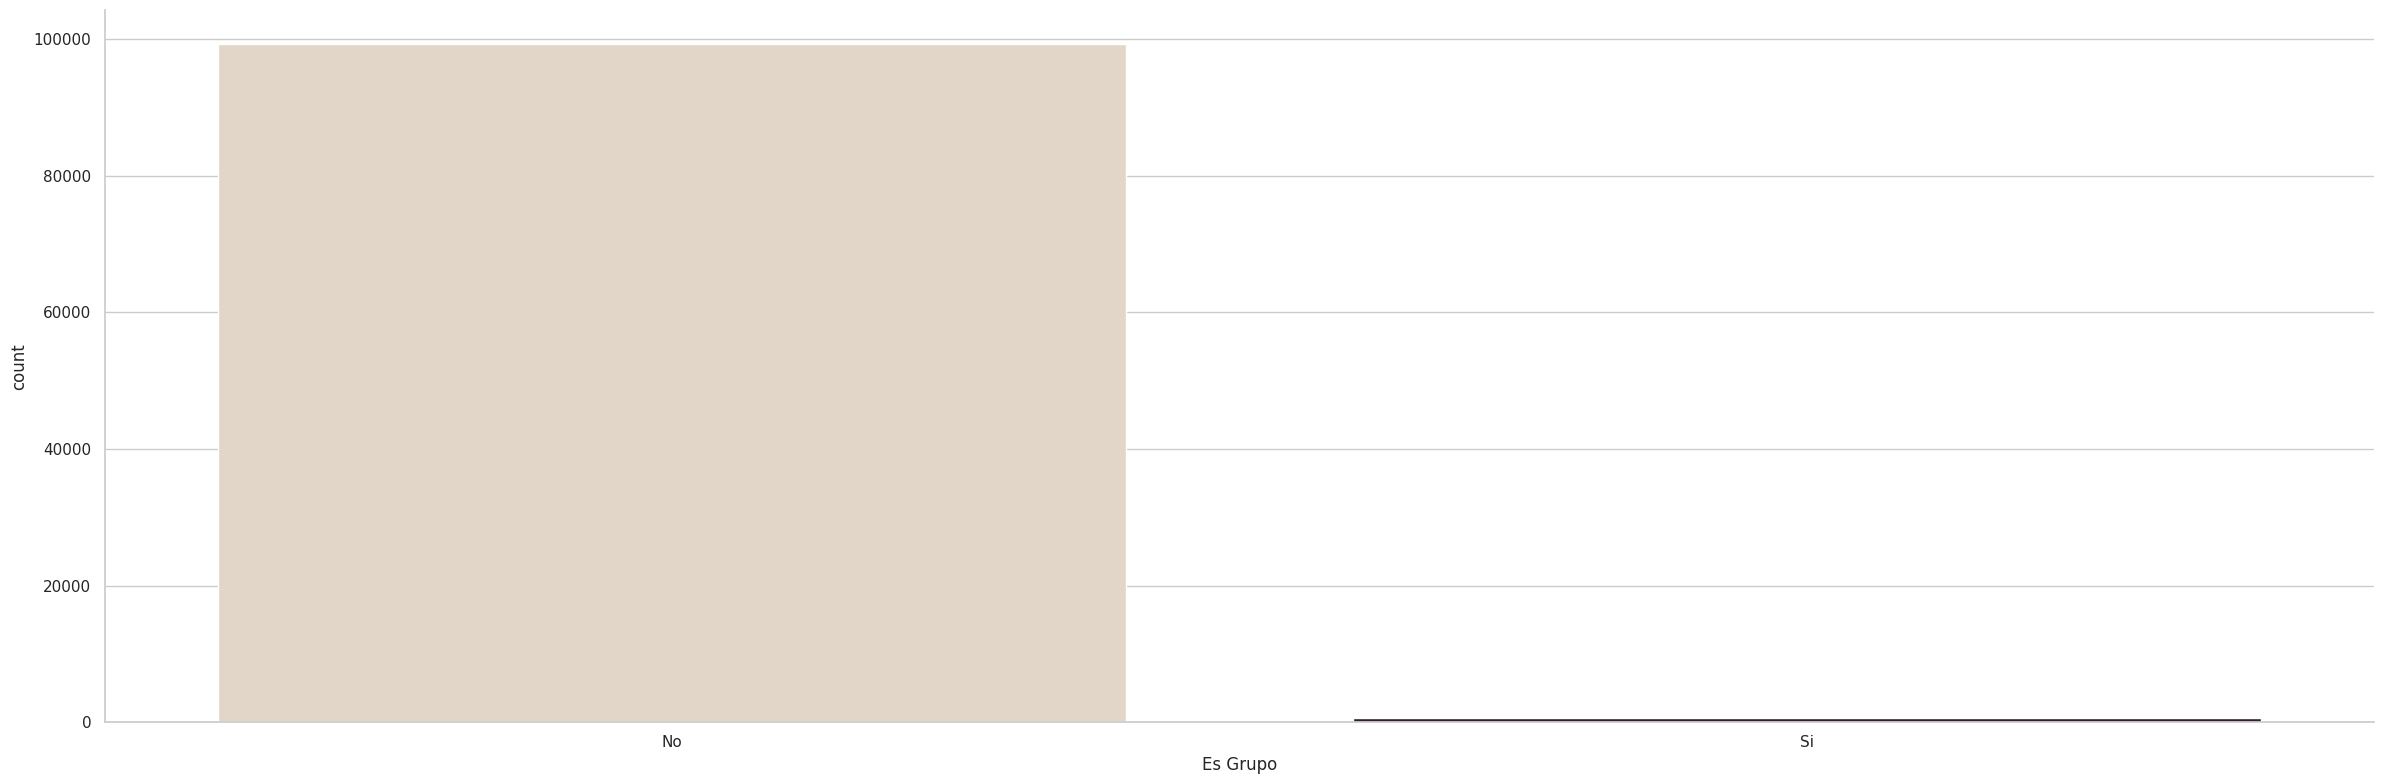

In [28]:
#análisis por grupo
sns.set(style="whitegrid")
sns.catplot(x="Es Grupo", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [29]:
dfSec = dfD[['Es Grupo','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Es Grupo']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Es Grupo,,,,,
No,"3,992,817,113,370,257.00$","2,210,545,929,502.00$","1,714,432,016,300.00$","11,969,536,164,268.00$","27,060,374,463.00$"
Si,"5,386,136,743,327.00$","1,271,645,878,482.00$","1,117,346,344,890.00$","4,267,926,045,112.00$","9,996,107,454.00$"


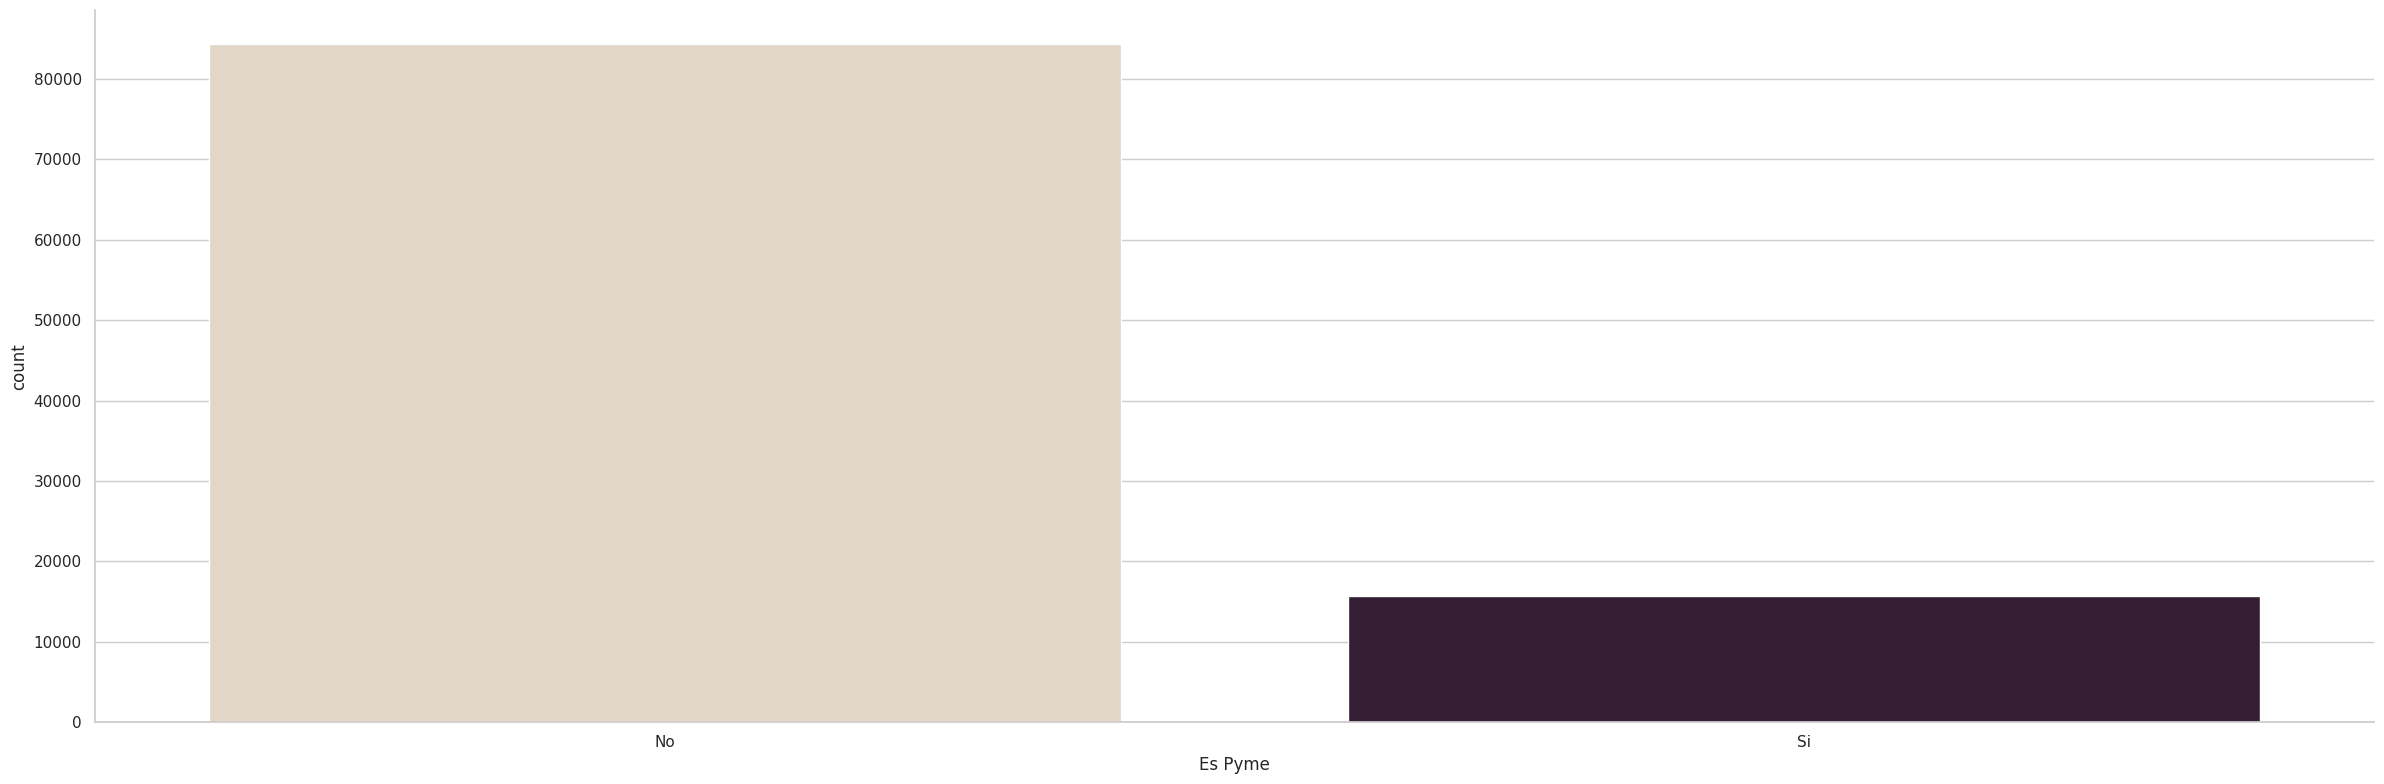

In [30]:
#análisis por pyme
sns.set(style="whitegrid")
sns.catplot(x="Es Pyme", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [31]:
dfSec = dfD[['Es Pyme','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Es Pyme']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Es Pyme,,,,,
No,"3,994,720,750,919,422.00$","2,562,266,858,020.00$","2,047,770,551,782.00$","12,912,941,087,382.00$","27,211,642,886.00$"
Si,"3,482,499,194,162.00$","919,924,949,964.00$","784,007,809,408.00$","3,324,521,121,998.00$","9,844,839,031.00$"


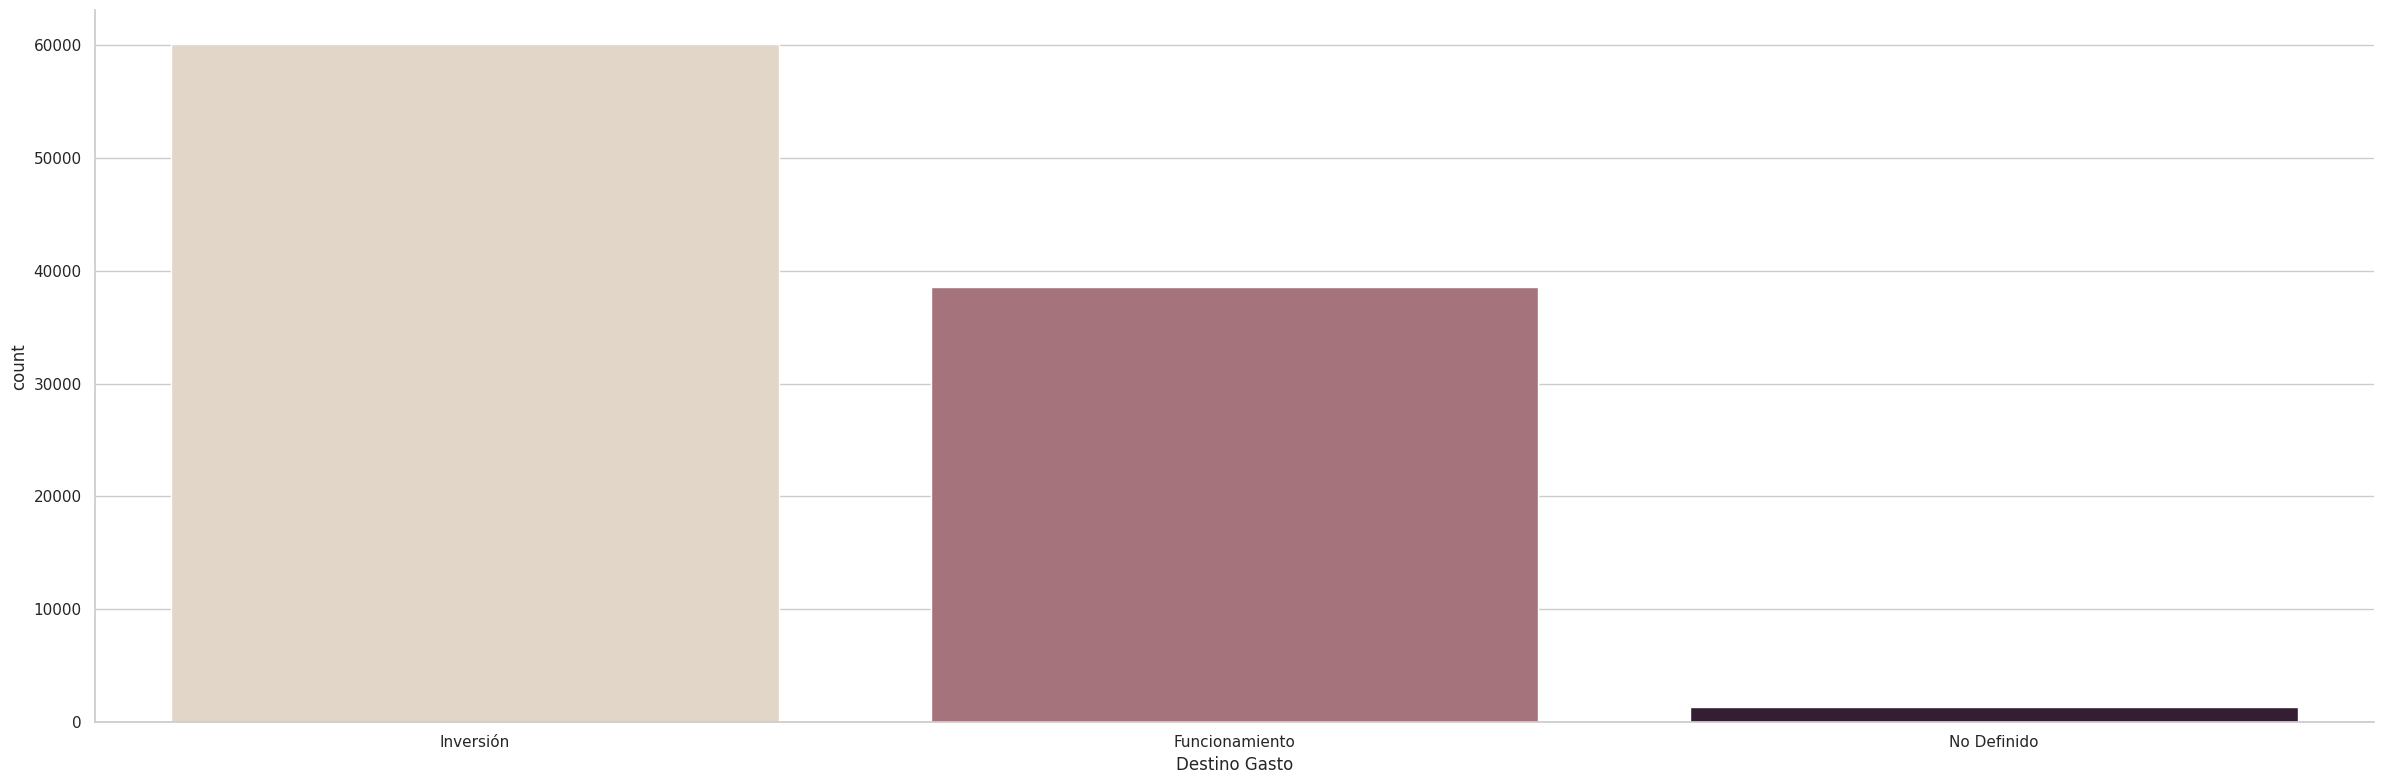

In [32]:
#análisis por destino gasto
sns.set(style="whitegrid")
sns.catplot(x="Destino Gasto", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [33]:
dfSec = dfD[['Destino Gasto','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Destino Gasto']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Destino Gasto,,,,,
Funcionamiento,"2,090,999,572,651,850.00$","1,347,967,619,436.00$","1,085,899,621,757.00$","4,117,646,234,261.00$","8,705,842,869.00$"
Inversión,"1,906,338,870,440,441.00$","2,125,646,375,491.00$","1,739,590,970,606.00$","10,633,010,197,698.00$","27,802,817,752.00$"
No Definido,"864,807,021,293.00$","8,577,813,057.00$","6,287,768,827.00$","1,486,805,777,421.00$","547,821,296.00$"


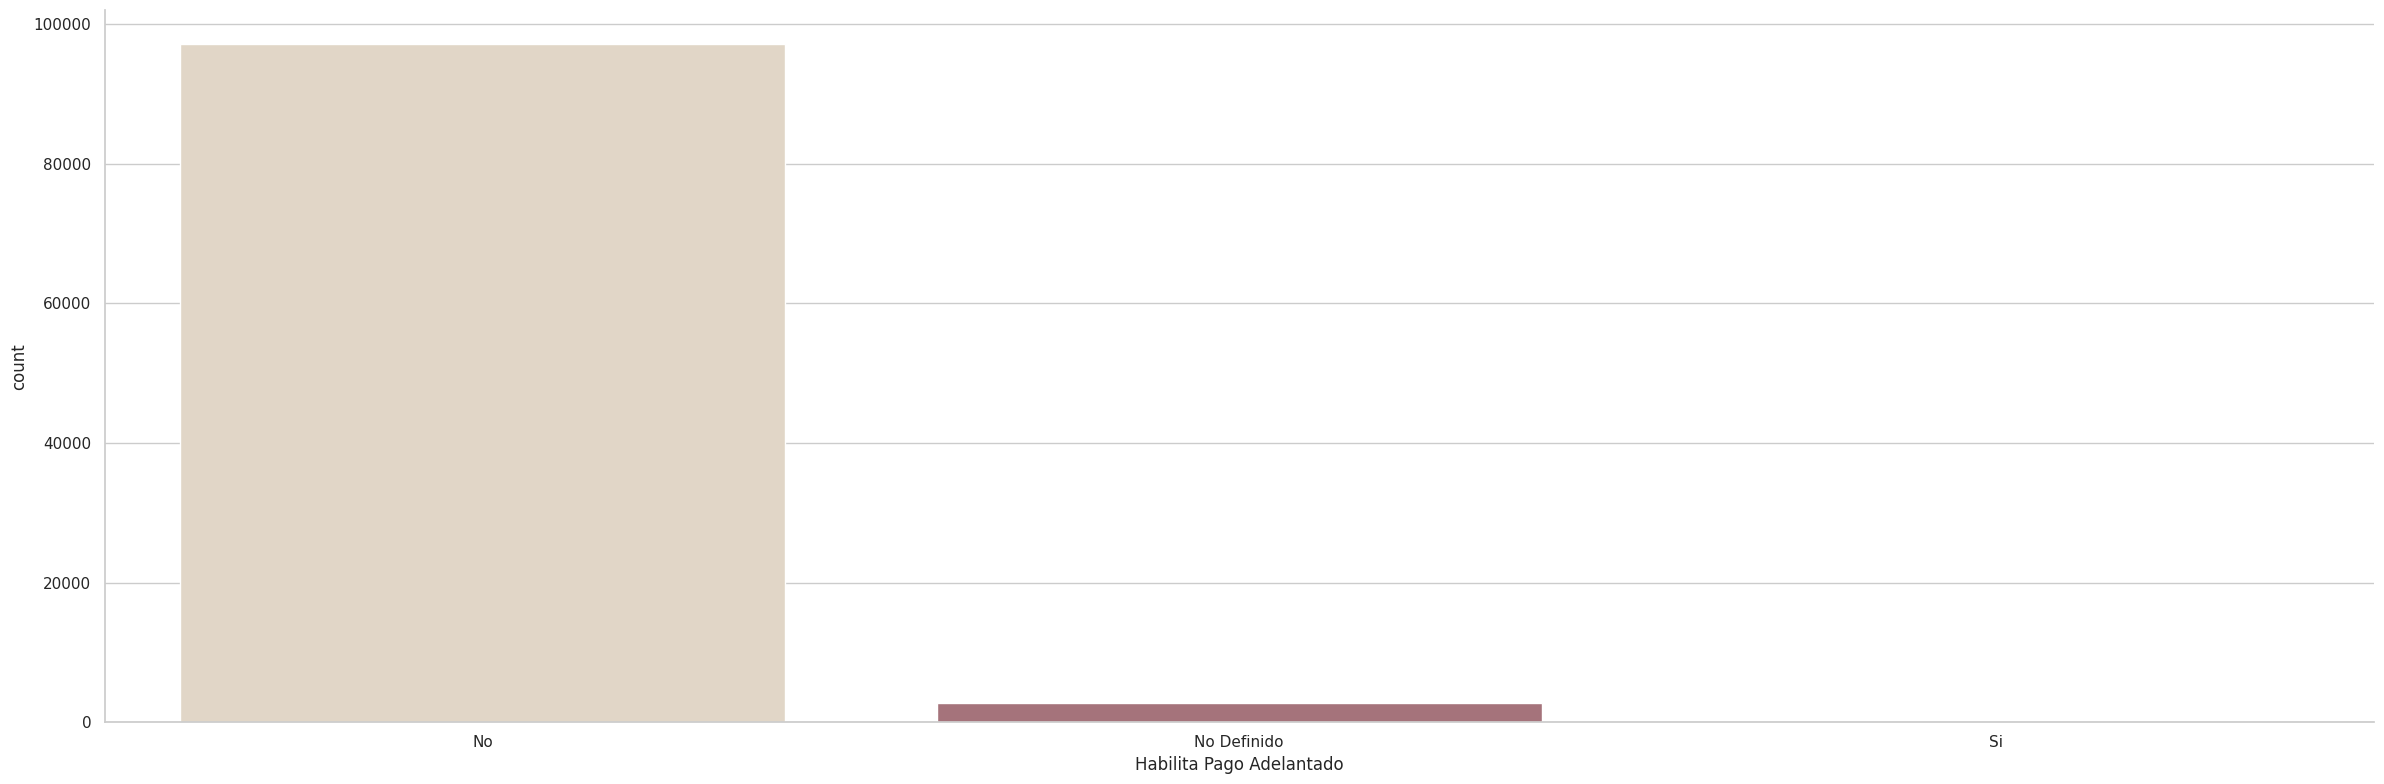

In [34]:
#análisis por habilita pago adelantado
sns.set(style="whitegrid")
sns.catplot(x="Habilita Pago Adelantado", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [35]:
dfSec = dfD[['Habilita Pago Adelantado','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Habilita Pago Adelantado']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Habilita Pago Adelantado,,,,,
No,"3,997,513,192,652,551.00$","3,468,743,875,989.00$","2,819,017,145,265.00$","15,575,180,297,886.00$","6,015,673,709.00$"
No Definido,"561,195,646,359.00$",0.00$,0.00$,"546,181,312,745.00$","1,405,769,007.00$"
Si,"128,861,814,674.00$","13,447,931,995.00$","12,761,215,925.00$","116,100,598,749.00$","29,635,039,201.00$"


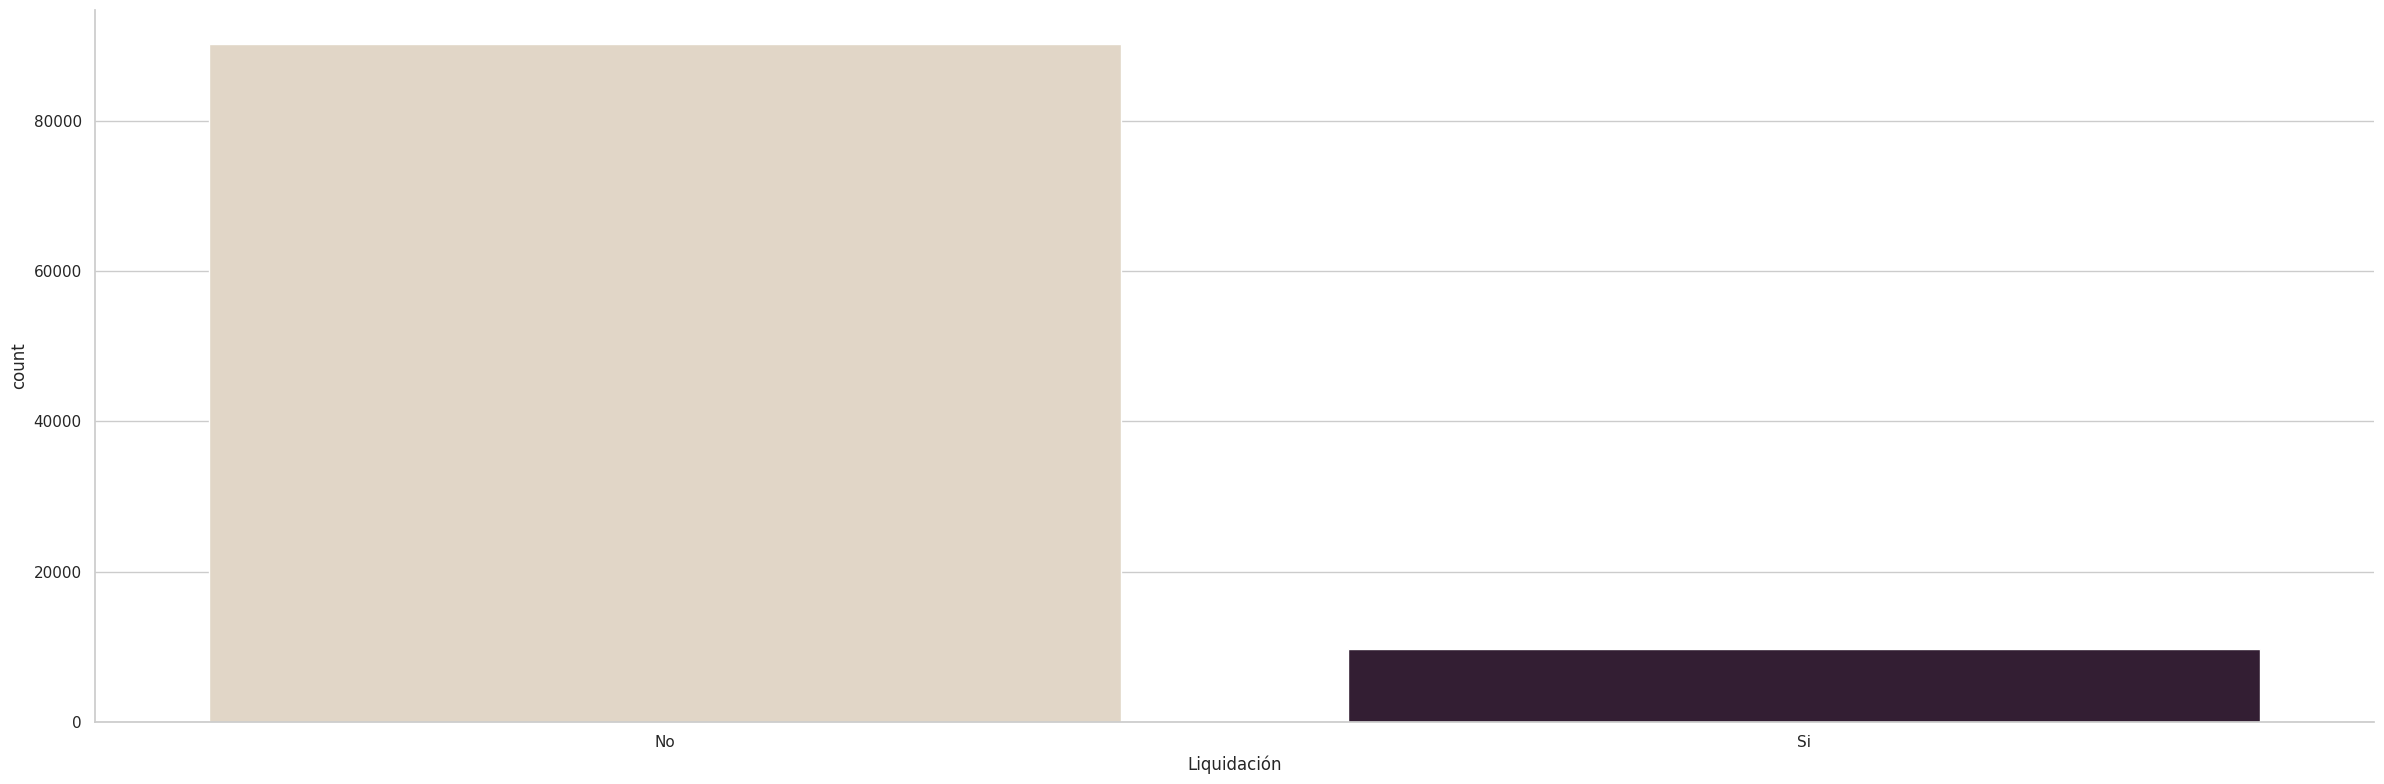

In [36]:
#análisis por liquidacion
sns.set(style="whitegrid")
sns.catplot(x="Liquidación", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [37]:
dfSec = dfD[['Liquidación','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Liquidación']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Liquidación,,,,,
No,"3,990,150,769,493,910.00$","1,654,284,471,178.00$","1,242,573,622,826.00$","9,145,533,162,856.00$","15,442,213,218.00$"
Si,"8,052,480,619,674.00$","1,827,907,336,806.00$","1,589,204,738,364.00$","7,091,929,046,524.00$","21,614,268,699.00$"


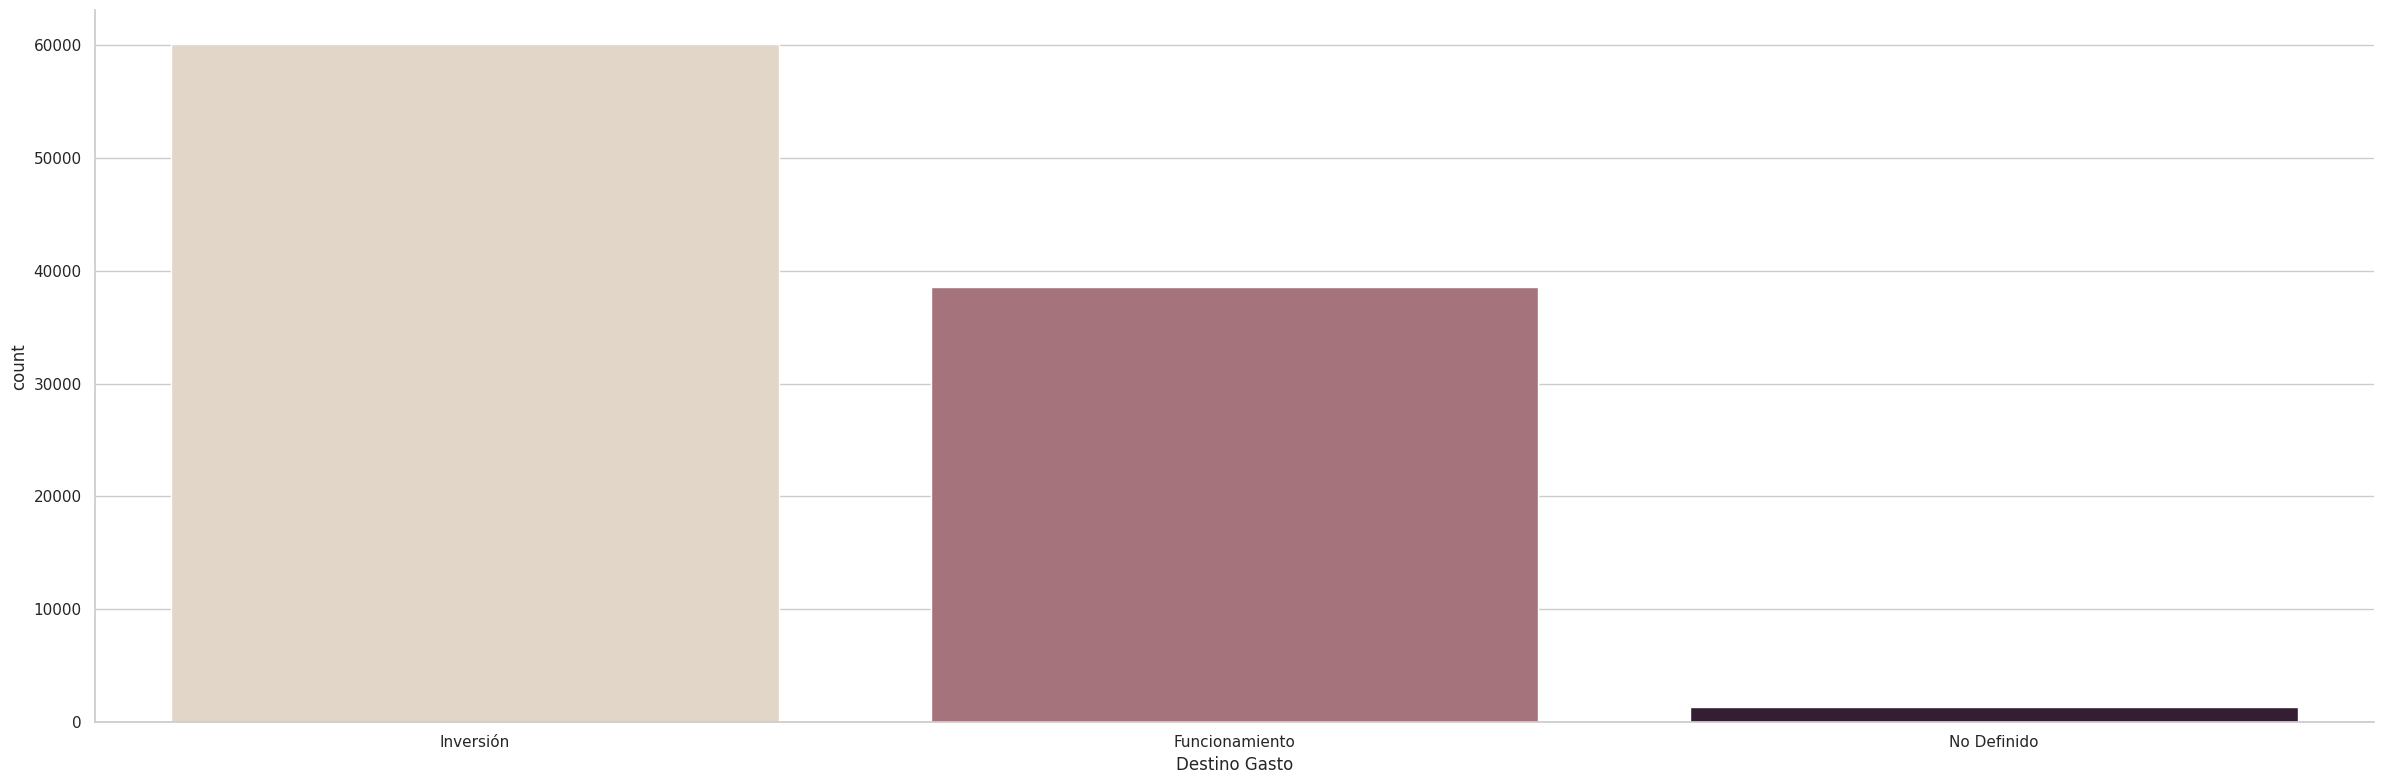

In [38]:
#análisis por Destino Gasto
sns.set(style="whitegrid")
sns.catplot(x="Destino Gasto", kind="count", palette="ch:.25", data=dfD, height = 8, aspect = 3)

In [39]:
dfSec = dfD[['Destino Gasto','Valor del Contrato','Valor Facturado','Valor Pagado','Valor Pendiente de Pago','Valor de pago adelantado']]
dfSec.groupby(['Destino Gasto']).agg(vlrContrato=("Valor del Contrato", "sum"),vlrFacturado=("Valor Facturado", "sum"),vlrPagado=("Valor Pagado", "sum"),vlrPPago=("Valor Pendiente de Pago", "sum"),vlrAdelantado=("Valor de pago adelantado", "sum")).style.format("{:,.2f}$")

,vlrContrato,vlrFacturado,vlrPagado,vlrPPago,vlrAdelantado
Destino Gasto,,,,,
Funcionamiento,"2,090,999,572,651,850.00$","1,347,967,619,436.00$","1,085,899,621,757.00$","4,117,646,234,261.00$","8,705,842,869.00$"
Inversión,"1,906,338,870,440,441.00$","2,125,646,375,491.00$","1,739,590,970,606.00$","10,633,010,197,698.00$","27,802,817,752.00$"
No Definido,"864,807,021,293.00$","8,577,813,057.00$","6,287,768,827.00$","1,486,805,777,421.00$","547,821,296.00$"


{'whiskers': [<matplotlib.lines.Line2D at 0x7e651e1591b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651e159720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651e159030>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651e159c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651e159f00>],
 'means': []}

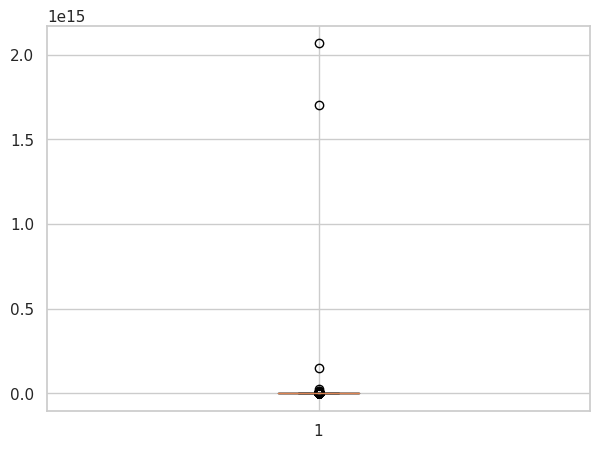

In [40]:
# Gráfico de boxplot campo ValorContrato
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor del Contrato'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651e022560>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651e022aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651e0222c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651e022fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651e023280>],
 'means': []}

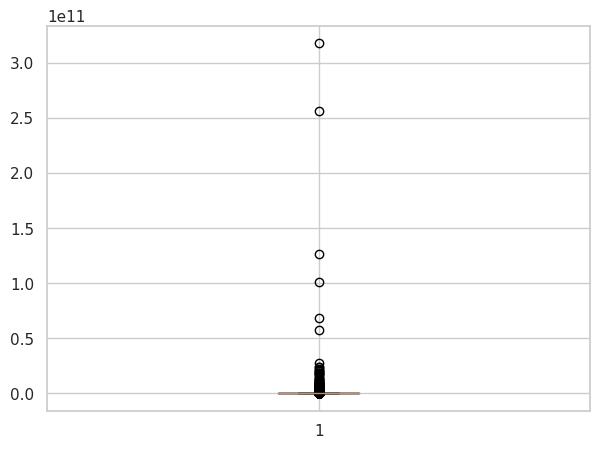

In [41]:
# Gráfico de boxplot campo Valor Facturado
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Facturado'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651e0b07f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651e0b0d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651e0b0550>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651e0b1270>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651e0b1510>],
 'means': []}

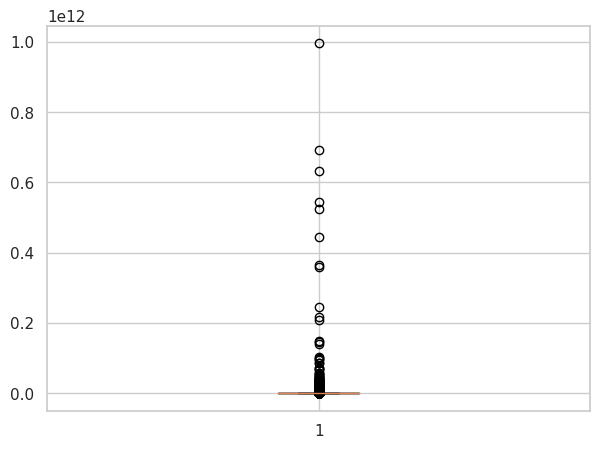

In [42]:
# Gráfico de boxplot campo Valor pendiente de pago
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Pago'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651df12770>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651df12cb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651df124d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651df131f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651df13490>],
 'means': []}

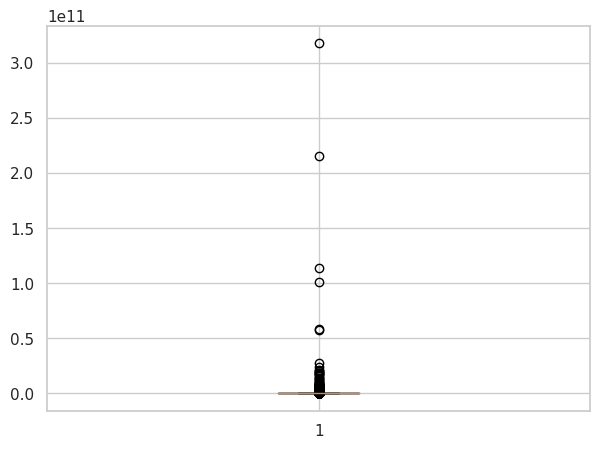

In [43]:
# Gráfico de boxplot campo Valor pagado
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pagado'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651dfa4820>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651dfa4d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651dfa4580>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651dfa52a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651dfa5540>],
 'means': []}

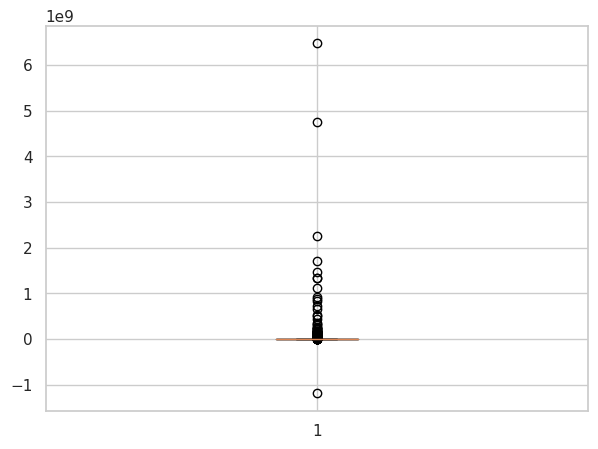

In [44]:
# Gráfico de boxplot campo Valor pendiente de amortizacion
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Amortizacion'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e651dfef490>,
 'caps': [<matplotlib.lines.Line2D at 0x7e651dfef9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e651dfef1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e651dfeff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e651de241f0>],
 'means': []}

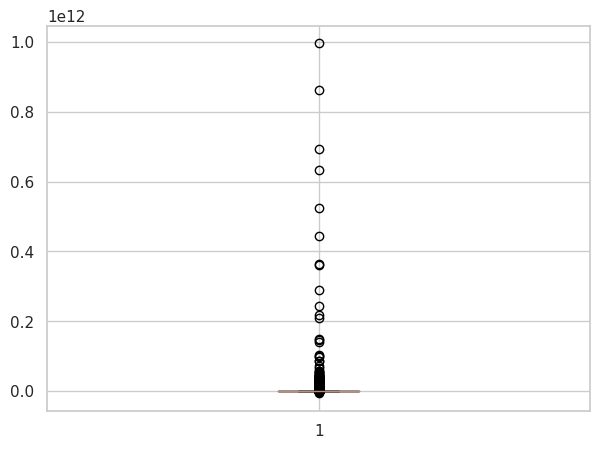

In [45]:
# Gráfico de boxplot campo Valor pendiente de ejecucion
plt.figure(figsize=(7,5))
plt.boxplot(dfD['Valor Pendiente de Ejecucion'])

In [46]:
dfDeG = df[['Dias Adicionados','Departamento']]
dfDeG.groupby(['Dias Adicionados']).agg(Cantidad=("Departamento", "count"))

,Cantidad
Dias Adicionados,
0,85226
1,129
2,100
3,101
4,101
...,...
606,1
731,1
944,1


In [47]:
# Validamos valores nulos
dfD.isna().any()

Departamento                       False
Orden                              False
Sector                             False
Rama                               False
Estado Contrato                    False
Tipo de Contrato                   False
Modalidad de Contratacion          False
Fecha de Inicio del Contrato        True
Fecha de Fin del Contrato           True
Fecha de Inicio de Ejecucion        True
Fecha de Fin de Ejecucion           True
Es Grupo                           False
Es Pyme                            False
Habilita Pago Adelantado           False
Liquidación                        False
Valor del Contrato                 False
Valor de pago adelantado           False
Valor Facturado                    False
Valor Pendiente de Pago            False
Valor Pagado                       False
Valor Pendiente de Amortizacion    False
Valor Pendiente de Ejecucion       False
Destino Gasto                      False
Dias Adicionados                   False
dtype: bool

In [48]:
#eliminados los contratos en estado terminado
index_names = dfD[(dfD['Estado Contrato'] == "terminado" ) ].index
dfD.drop(index_names, inplace = True)

<ipython-input-48-ed5598ed76dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfD.drop(index_names, inplace = True)


In [49]:
dfSec = dfD[['Estado Contrato','Valor del Contrato']]
dfSec.groupby(['Estado Contrato']).agg(Cantidad=("Valor del Contrato", "count")).style.format("{:,.2f}")

,Cantidad
Estado Contrato,
Activo,"11,189.00"
Borrador,"4,851.00"
Cerrado,"6,276.00"
En aprobación,813.00
En ejecución,"37,531.00"
Modificado,"24,411.00"
Prorrogado,6.00
Suspendido,160.00
cedido,725.00


In [50]:
# eliminamos las columnas de fecha
dfD=dfD.drop(["Fecha de Inicio del Contrato","Fecha de Fin del Contrato","Fecha de Inicio de Ejecucion","Fecha de Fin de Ejecucion"],axis=1)

In [51]:
#se realiza numeralizacion de las variables categoricas
dfD["Departamento"].replace({"Amazonas":"1","Antioquia":"2","Arauca":3,"Atlántico":"4","Bolívar":"5","Boyacá":6,"Caldas":"7","Caquetá":"8","Casanare":9,"Cauca":"10","Cesar":"11","Chocó":12,"Córdoba":"13","Cundinamarca":"14","Distrito Capital de Bogotá":15,"Guainía":"16","Guaviare":"17","Huila":18,"La Guajira":"19","Magdalena":"20","Meta":21,"Nariño":22,"Norte de Santander":"23","Putumayo":"24","Quindío":25,"Risaralda":"26","San Andrés, Providencia y Santa Catalina":27,"Santander":28,"Sucre":"29","Tolima":"30","Valle del Cauca":31,"Vaupés":"32","Vichada":"33","No Definido":0}, inplace = True)
dfD["Orden"].replace({"Nacional":"1","Territorial":"2","Corporación Autónoma":3,"No Definido":"0"}, inplace = True)
dfD["Sector"].replace({"agricultura":"1","Ambiente y Desarrollo Sostenible":"2","Ciencia Tecnología":3,"Cultura":"4","defensa":"5","deportes":6,"Educación Nacional":"7","Hacienda y Crédito Público":"8","Inclusión Social y Reconciliación":9,"Industria":"10","Información Estadística":"11","Inteligencia Estratégica y Contrainteligencia":12,"interior":"13","Ley de Justicia":"14","Minas y Energía":15,"No aplica/No pertenece":"0","Planeación":"16","Presidencia de la República":17,"Relaciones Exteriores":"18","Salud y Protección Social":"19","Servicio Público":20,"Tecnologías de la Información y las Comunicaciones":21,"Trabajo":"22","Transporte":"23","Vivienda, Ciudad y Territorio":24,"No Definido":25}, inplace = True)
dfD["Rama"].replace({"Ejecutivo":"1","Judicial":"2","Corporación Autónoma":3,"Legislativo":"0", "No Definido":4}, inplace = True)
#dfD["Estado Contrato"].replace({"Activo":"1","cedido":"2","Cerrado":3,"En ejecución":"4","Modificado":"5","Prorrogado":6,"Suspendido":"7","terminado":"8", "Borrador":"9", "En aprobación":"10", "enviado Proveedor":"11"}, inplace = True)
dfD["Estado Contrato"].replace({"Activo":0,"cedido":0,"Cerrado":1,"En ejecución":0,"Modificado":0,"Prorrogado":0,"Suspendido":0,"terminado":1, "Borrador":0, "En aprobación":0, "enviado Proveedor":0}, inplace = True)
dfD["Tipo de Contrato"].replace({"Acuerdo de cooperación":"1","Arrendamiento de inmuebles":"2","Arrendamiento de muebles":3,"Asociación Público Privada":"4","Comisión":"5","Comodato":6,"Compraventa":"7","Concesión":"8","Consultoría":9,"DecreeLaw092/2017":"10","Emprestito":"11","Interventoría":12,"Negocio fiduciario":"13","Obra":"14","Otro":15,"No Especificado":"0","Prestación de servicios":"16","Seguros":17,"Servicios financieros":"18","Suministros":"19", "Venta inmuebles":"20", "Venta muebles":"21", "Acuerdo Marco de Precios":"22","No Definido":23}, inplace = True)
dfD["Modalidad de Contratacion"].replace({"CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre":"1","CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre":"2","Concurso de méritos abierto":3,"Concurso de méritos con precalificación":"4","Contratación Directa (con ofertas)":"5","Contratación directa":6,"Contratación régimen especial":"7","Contratación régimen especial (con ofertas)":"8","Enajenación de bienes con sobre cerrado":9,"Enajenación de bienes con subasta":"10","Licitación Pública Acuerdo Marco de Precios":"11","Licitación pública":12,"Licitación pública Obra Publica":"13","Mínima cuantía":"14","No Definido":15,"Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes":"16","Selección Abreviada de Menor Cuantía":"17","Selección abreviada subasta inversa":18, "No Definido":19}, inplace = True)
dfD["Es Grupo"].replace({"Si":"1","No":"0"}, inplace = True)
dfD["Es Pyme"].replace({"Si":"1","No":"0"}, inplace = True)
dfD["Habilita Pago Adelantado"].replace({"Si":"1","No":"0", "No Definido":"2"}, inplace = True)
dfD["Liquidación"].replace({"Si":1,"No":0,"No Definido":3}, inplace = True)
dfD["Destino Gasto"].replace({"Inversión":"1","Funcionamiento":"2","No Definido":"0"}, inplace = True)

In [52]:
dfD.head()

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Modalidad de Contratacion,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados
0,23,2,20,1,0,16,6,0,0,0,0,8000000,0,8000000,3200000,4800000,0,8000000,1,0
1,22,1,22,1,0,16,6,0,0,0,0,34730000,0,34723675,1265000,33465000,0,34730000,1,5
3,15,1,2,3,0,16,6,0,0,2,0,0,0,0,0,0,0,0,1,0
4,28,2,20,1,0,16,6,0,0,0,0,11700000,0,0,11700000,0,0,11700000,1,0
5,15,1,20,1,0,16,6,0,0,0,0,25440000,0,0,25440000,0,0,25440000,1,0


In [53]:
# Matriz de correlacion
dfPymeCor = dfD.loc[:, ~dfD.columns.isin(['Fecha de Firma','Fecha de Inicio del Contrato','Fecha de Fin del Contrato','Fecha de Inicio del Contrato'])]
dfPymeCor.shape

(87133, 20)

In [54]:
corrMatrix=dfPymeCor.corr()
corrMatrix

<ipython-input-54-c28700ec80f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=dfPymeCor.corr()


,Estado Contrato,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Dias Adicionados
Estado Contrato,1.000000,0.055787,-0.001403,-0.004085,-0.001750,-0.001546,-0.000586,-0.003843,-0.002048,-0.085414
Liquidación,0.055787,1.000000,-0.001524,0.020422,0.034414,0.033870,0.032207,0.020587,0.034417,0.023570
Valor del Contrato,-0.001403,-0.001524,1.000000,-0.000064,0.000214,0.000428,0.000237,-0.000060,0.000449,-0.001543
Valor de pago adelantado,-0.004085,0.020422,-0.000064,1.000000,0.003976,0.015016,0.003564,0.977762,0.008518,0.001585
Valor Facturado,-0.001750,0.034414,0.000214,0.003976,1.000000,0.268491,0.993533,0.001786,0.436952,0.005454
Valor Pendiente de Pago,-0.001546,0.033870,0.000428,0.015016,0.268491,1.000000,0.277798,0.015371,0.976425,0.008744
Valor Pagado,-0.000586,0.032207,0.000237,0.003564,0.993533,0.277798,1.000000,0.001214,0.446865,0.003152
Valor Pendiente de Amortizacion,-0.003843,0.020587,-0.000060,0.977762,0.001786,0.015371,0.001214,1.000000,0.008154,0.000393
Valor Pendiente de Ejecucion,-0.002048,0.034417,0.000449,0.008518,0.436952,0.976425,0.446865,0.008154,1.000000,0.007260
Dias Adicionados,-0.085414,0.023570,-0.001543,0.001585,0.005454,0.008744,0.003152,0.000393,0.007260,1.000000


<Axes: >

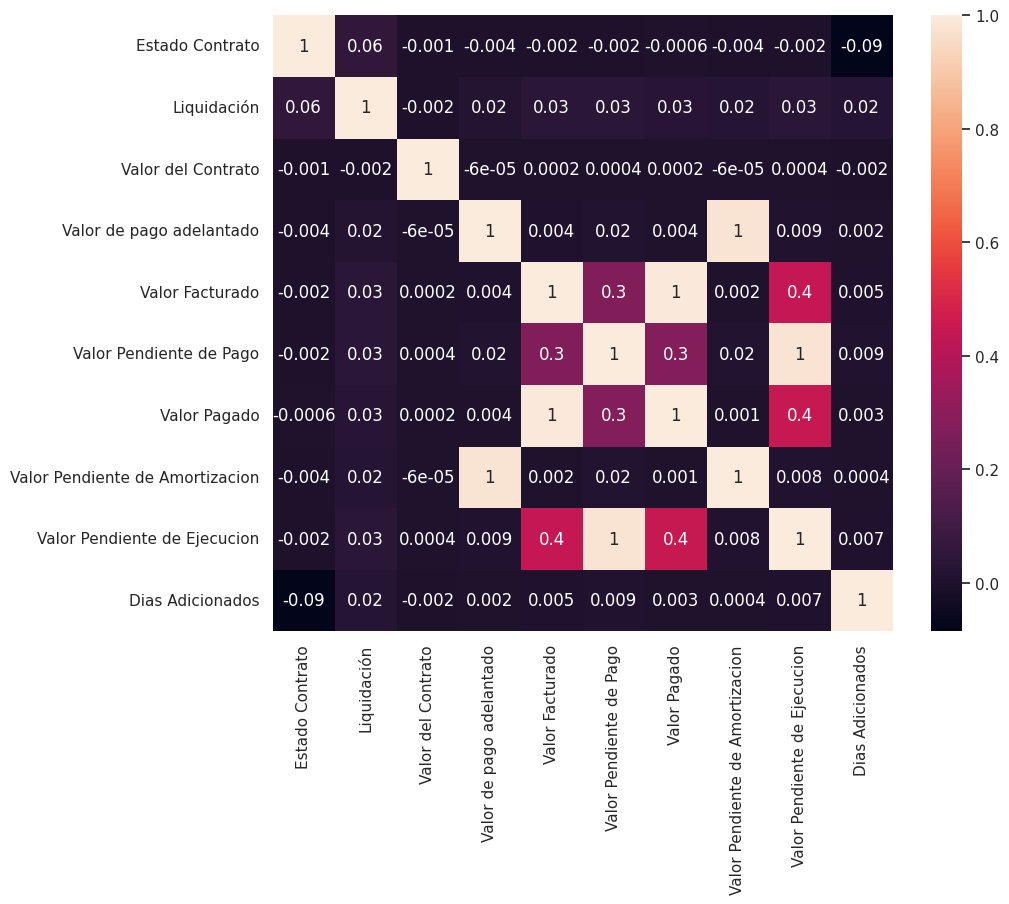

In [55]:
#Importe nuevamente las librias de Seaborn y Matplotlib en caso de que no estén importadas
#Sentencia para ajustar la visualización y tamaño del gráfico
f, ax = plt.subplots(figsize=(10, 8))
#HeatMap de Seaborn, annot:muestra valores, fmt:decimales, ax:visializacion
sns.heatmap(corrMatrix,annot = True,fmt='.1g',ax=ax)

##Clusterizacion

In [56]:
#dfCluster = dfD.loc[:, ~dfD.columns.isin(['Fecha de Firma','Fecha de Inicio del Contrato','Fecha de Fin del Contrato','Fecha de Inicio del Contrato'])]
dfCluster = dfD.loc[:, ~dfD.columns.isin(['Fecha de Firma','Liquidacion','Modalidad de Contratacion','Valor Pendiente de Pago','Fecha de Inicio del Contrato','Fecha de Fin del Contrato','Fecha de Inicio del Contrato'])]


In [57]:
dfCluster["Departamento"] = dfCluster["Departamento"].astype(int)
dfCluster["Orden"] = dfCluster["Orden"].astype(int)
dfCluster["Sector"] = dfCluster["Sector"].astype(int)
dfCluster["Rama"] = dfCluster["Rama"].astype(int)
dfCluster["Estado Contrato"] = dfCluster["Rama"].astype(int)
dfCluster["Tipo de Contrato"] = dfCluster["Tipo de Contrato"].astype(int)
#dfCluster["Modalidad de Contratacion"] = dfCluster["Modalidad de Contratacion"].astype(int)
dfCluster["Es Grupo"] = dfCluster["Es Grupo"].astype(int)
dfCluster["Es Pyme"] = dfCluster["Es Pyme"].astype(int)
dfCluster["Habilita Pago Adelantado"] = dfCluster["Habilita Pago Adelantado"].astype(int)
#dfCluster["Liquidación"] = dfCluster["Liquidación"].astype(float)
dfCluster["Valor del Contrato"] = dfCluster["Valor del Contrato"].astype(float)
dfCluster["Valor de pago adelantado"] = dfCluster["Valor de pago adelantado"].astype(float)
dfCluster["Valor Facturado"] = dfCluster["Valor Facturado"].astype(float)
#dfCluster["Valor Pendiente de Pago"] = dfCluster["Valor Pendiente de Pago"].astype(float)
dfCluster["Valor Pagado"] = dfCluster["Valor Pagado"].astype(float)
dfCluster["Destino Gasto"] = dfCluster["Destino Gasto"].astype(float)

<ipython-input-57-03c95a40e447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCluster["Departamento"] = dfCluster["Departamento"].astype(int)
<ipython-input-57-03c95a40e447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCluster["Orden"] = dfCluster["Orden"].astype(int)
<ipython-input-57-03c95a40e447>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [58]:
dfCluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87133 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Departamento                     87133 non-null  int64  
 1   Orden                            87133 non-null  int64  
 2   Sector                           87133 non-null  int64  
 3   Rama                             87133 non-null  int64  
 4   Estado Contrato                  87133 non-null  int64  
 5   Tipo de Contrato                 87133 non-null  int64  
 6   Es Grupo                         87133 non-null  int64  
 7   Es Pyme                          87133 non-null  int64  
 8   Habilita Pago Adelantado         87133 non-null  int64  
 9   Liquidación                      87133 non-null  int64  
 10  Valor del Contrato               87133 non-null  float64
 11  Valor de pago adelantado         87133 non-null  float64
 12  Valor Facturado   

In [59]:
#mètodo del codo..es un evento grafico que permite ver el punto de inflecciòn a partir de las distancias
ks=range(2,10)
inertias=[]

for k in ks:
  #creamos el modelo
  modelo=KMeans(n_clusters=k)
  modelo.fit(dfCluster)
  inertias.append(modelo.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

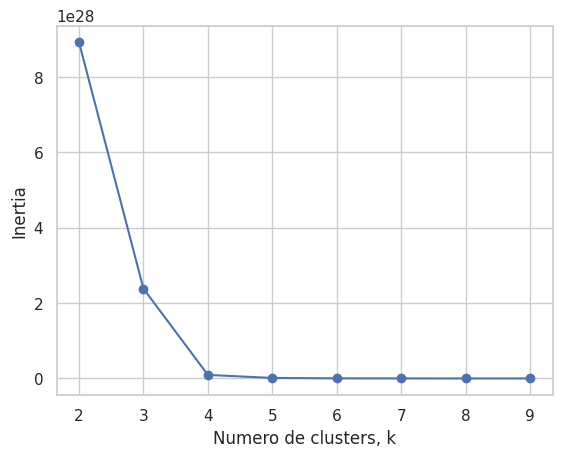

In [60]:
#grafiquemos el metodo del codo
plt.plot(ks,inertias,'-o')
plt.xlabel('Numero de clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()
#en el punto aproximado donde hay quiere un codo, quiere decir que a partir de allì es muy suave

In [61]:
#numero de centroides
modelo=KMeans(n_clusters=3,max_iter=100)
modelo.fit(dfCluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [62]:
centroides=pd.DataFrame(modelo.cluster_centers_,columns=dfCluster.columns.values)
centroides.round(0)

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados
0,17.0,2.0,12.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,2.560258e+09,333652.0,33025380.0,26466285.0,305637.0,178871808.0,1.0,11.0
1,14.0,2.0,7.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,2.067218e+15,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,15.0,1.0,11.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,1.705690e+15,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
#asignemos un cluster a cada registros
dfCluster['cluster']=modelo.predict(dfCluster)
dfCluster.head()

<ipython-input-63-86e8e9da408f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCluster['cluster']=modelo.predict(dfCluster)


,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados,cluster
0,23,2,20,1,1,16,0,0,0,0,8000000.0,0.0,8000000.0,4800000.0,0,8000000,1.0,0,0
1,22,1,22,1,1,16,0,0,0,0,34730000.0,0.0,34723675.0,33465000.0,0,34730000,1.0,5,0
3,15,1,2,3,3,16,0,0,2,0,0.0,0.0,0.0,0.0,0,0,1.0,0,0
4,28,2,20,1,1,16,0,0,0,0,11700000.0,0.0,0.0,0.0,0,11700000,1.0,0,0
5,15,1,20,1,1,16,0,0,0,0,25440000.0,0.0,0.0,0.0,0,25440000,1.0,0,0


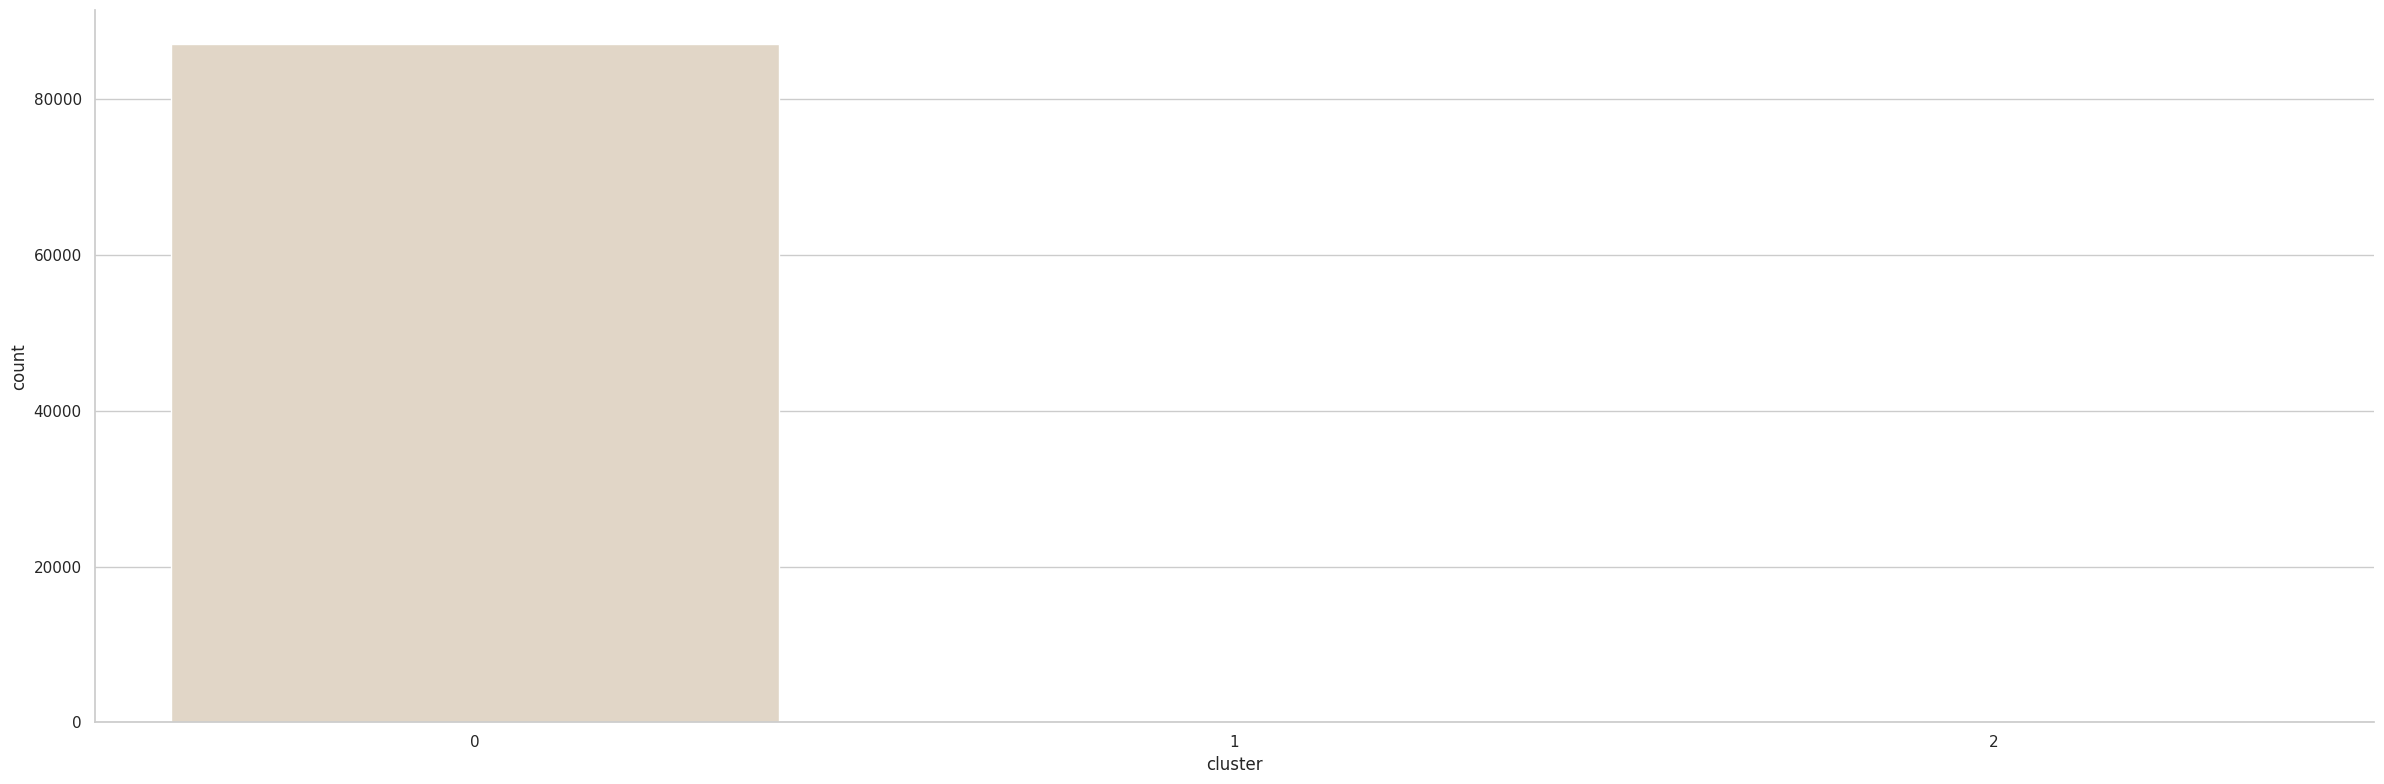

In [64]:
#análisis por Destino Gasto
sns.set(style="whitegrid")
sns.catplot(x="cluster", kind="count", palette="ch:.25", data=dfCluster, height = 8, aspect = 3)

In [65]:
#iniciamos el descriptivo
dfCluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87133 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Departamento                     87133 non-null  int64  
 1   Orden                            87133 non-null  int64  
 2   Sector                           87133 non-null  int64  
 3   Rama                             87133 non-null  int64  
 4   Estado Contrato                  87133 non-null  int64  
 5   Tipo de Contrato                 87133 non-null  int64  
 6   Es Grupo                         87133 non-null  int64  
 7   Es Pyme                          87133 non-null  int64  
 8   Habilita Pago Adelantado         87133 non-null  int64  
 9   Liquidación                      87133 non-null  int64  
 10  Valor del Contrato               87133 non-null  float64
 11  Valor de pago adelantado         87133 non-null  float64
 12  Valor Facturado   

In [66]:
dfCluster.head()

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados,cluster
0,23,2,20,1,1,16,0,0,0,0,8000000.0,0.0,8000000.0,4800000.0,0,8000000,1.0,0,0
1,22,1,22,1,1,16,0,0,0,0,34730000.0,0.0,34723675.0,33465000.0,0,34730000,1.0,5,0
3,15,1,2,3,3,16,0,0,2,0,0.0,0.0,0.0,0.0,0,0,1.0,0,0
4,28,2,20,1,1,16,0,0,0,0,11700000.0,0.0,0.0,0.0,0,11700000,1.0,0,0
5,15,1,20,1,1,16,0,0,0,0,25440000.0,0.0,0.0,0.0,0,25440000,1.0,0,0


In [67]:
dfCluster = dfCluster[:500]

In [68]:
dfCluster.head()

,Departamento,Orden,Sector,Rama,Estado Contrato,Tipo de Contrato,Es Grupo,Es Pyme,Habilita Pago Adelantado,Liquidación,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pagado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion,Destino Gasto,Dias Adicionados,cluster
0,23,2,20,1,1,16,0,0,0,0,8000000.0,0.0,8000000.0,4800000.0,0,8000000,1.0,0,0
1,22,1,22,1,1,16,0,0,0,0,34730000.0,0.0,34723675.0,33465000.0,0,34730000,1.0,5,0
3,15,1,2,3,3,16,0,0,2,0,0.0,0.0,0.0,0.0,0,0,1.0,0,0
4,28,2,20,1,1,16,0,0,0,0,11700000.0,0.0,0.0,0.0,0,11700000,1.0,0,0
5,15,1,20,1,1,16,0,0,0,0,25440000.0,0.0,0.0,0.0,0,25440000,1.0,0,0


In [69]:
# Utilice este espacio para escribir el código.
dfCluster = dfCluster.iloc[:,[0,10]].values

In [70]:
dfCluster

array([[2.30000000e+01, 8.00000000e+06],
       [2.20000000e+01, 3.47300000e+07],
       [1.50000000e+01, 0.00000000e+00],
       [2.80000000e+01, 1.17000000e+07],
       [1.50000000e+01, 2.54400000e+07],
       [1.50000000e+01, 3.26574370e+07],
       [1.50000000e+01, 1.02500000e+07],
       [1.50000000e+01, 6.68000000e+06],
       [2.60000000e+01, 1.08000000e+07],
       [1.50000000e+01, 2.09995720e+07],
       [3.00000000e+01, 2.28000000e+07],
       [1.50000000e+01, 4.52112010e+07],
       [1.40000000e+01, 9.66000000e+06],
       [1.50000000e+01, 1.54487510e+07],
       [1.50000000e+01, 5.00000000e+07],
       [1.50000000e+01, 1.30770000e+07],
       [1.50000000e+01, 8.50791370e+07],
       [1.50000000e+01, 1.63076940e+07],
       [1.40000000e+01, 3.79166750e+07],
       [3.10000000e+01, 1.40000000e+07],
       [1.80000000e+01, 1.19444000e+07],
       [3.10000000e+01, 3.50000000e+07],
       [3.10000000e+01, 3.86252800e+06],
       [1.00000000e+01, 1.98000000e+07],
       [5.000000

In [71]:
# Estandarización de los datos. Se persisten en la matriz de datos estandarizados Z.
mu = dfCluster.mean()
sigma = dfCluster.std()
dfCE = (dfCluster - mu)/sigma

In [72]:
dfCE

array([[-1.01516616e-01, -8.72587447e-02],
       [-1.01516618e-01, -3.96194951e-02],
       [-1.01516630e-01, -1.01516657e-01],
       [-1.01516607e-01, -8.06644602e-02],
       [-1.01516630e-01, -5.61764958e-02],
       [-1.01516630e-01, -4.33132978e-02],
       [-1.01516630e-01, -8.32487068e-02],
       [-1.01516630e-01, -8.96113002e-02],
       [-1.01516611e-01, -8.22684754e-02],
       [-1.01516630e-01, -6.40903999e-02],
       [-1.01516604e-01, -6.08816069e-02],
       [-1.01516630e-01, -2.09394895e-02],
       [-1.01516632e-01, -8.43002279e-02],
       [-1.01516630e-01, -7.39832898e-02],
       [-1.01516630e-01, -1.24047049e-02],
       [-1.01516630e-01, -7.82103171e-02],
       [-1.01516630e-01,  5.01147026e-02],
       [-1.01516630e-01, -7.24524481e-02],
       [-1.01516632e-01, -3.39400785e-02],
       [-1.01516602e-01, -7.65653104e-02],
       [-1.01516625e-01, -8.02288810e-02],
       [-1.01516602e-01, -3.91382905e-02],
       [-1.01516602e-01, -9.46327088e-02],
       [-1.

In [73]:
dist = distance_matrix(dfCluster, dfCluster, p = 2)

In [74]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000e+00,2.673000e+07,8.000000e+06,3.700000e+06,1.744000e+07,2.465744e+07,2.250000e+06,1.320000e+06,2.800000e+06,1.299957e+07,...,4.833333e+06,3.260000e+07,2.750000e+06,8.000000e+06,2.387960e+06,1.278167e+07,8.000000e+06,1.203400e+07,7.204070e+05,4.071900e+07
1,2.673000e+07,0.000000e+00,3.473000e+07,2.303000e+07,9.290000e+06,2.072563e+06,2.448000e+07,2.805000e+07,2.393000e+07,1.373043e+07,...,3.156333e+07,5.870000e+06,2.948000e+07,1.873000e+07,2.911796e+07,1.394833e+07,3.473000e+07,1.469600e+07,2.745041e+07,1.398900e+07
2,8.000000e+06,3.473000e+07,0.000000e+00,1.170000e+07,2.544000e+07,3.265744e+07,1.025000e+07,6.680000e+06,1.080000e+07,2.099957e+07,...,3.166667e+06,4.060000e+07,5.250000e+06,1.600000e+07,5.612040e+06,2.078167e+07,1.300000e+01,2.003400e+07,7.279593e+06,4.871900e+07
3,3.700000e+06,2.303000e+07,1.170000e+07,0.000000e+00,1.374000e+07,2.095744e+07,1.450000e+06,5.020000e+06,9.000000e+05,9.299572e+06,...,8.533333e+06,2.890000e+07,6.450000e+06,4.300000e+06,6.087960e+06,9.081667e+06,1.170000e+07,8.334000e+06,4.420407e+06,3.701900e+07
4,1.744000e+07,9.290000e+06,2.544000e+07,1.374000e+07,0.000000e+00,7.217437e+06,1.519000e+07,1.876000e+07,1.464000e+07,4.440428e+06,...,2.227333e+07,1.516000e+07,2.019000e+07,9.440000e+06,1.982796e+07,4.658333e+06,2.544000e+07,5.406000e+06,1.816041e+07,2.327900e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.278167e+07,1.394833e+07,2.078167e+07,9.081667e+06,4.658333e+06,1.187577e+07,1.053167e+07,1.410167e+07,9.981667e+06,2.179050e+05,...,1.761500e+07,1.981833e+07,1.553167e+07,4.781667e+06,1.516963e+07,0.000000e+00,2.078167e+07,7.476670e+05,1.350207e+07,2.793733e+07
496,8.000000e+06,3.473000e+07,1.300000e+01,1.170000e+07,2.544000e+07,3.265744e+07,1.025000e+07,6.680000e+06,1.080000e+07,2.099957e+07,...,3.166667e+06,4.060000e+07,5.250000e+06,1.600000e+07,5.612040e+06,2.078167e+07,0.000000e+00,2.003400e+07,7.279593e+06,4.871900e+07
497,1.203400e+07,1.469600e+07,2.003400e+07,8.334000e+06,5.406000e+06,1.262344e+07,9.784000e+06,1.335400e+07,9.234000e+06,9.655720e+05,...,1.686733e+07,2.056600e+07,1.478400e+07,4.034000e+06,1.442196e+07,7.476670e+05,2.003400e+07,0.000000e+00,1.275441e+07,2.868500e+07
498,7.204070e+05,2.745041e+07,7.279593e+06,4.420407e+06,1.816041e+07,2.537784e+07,2.970407e+06,5.995930e+05,3.520407e+06,1.371998e+07,...,4.112926e+06,3.332041e+07,2.029593e+06,8.720407e+06,1.667553e+06,1.350207e+07,7.279593e+06,1.275441e+07,0.000000e+00,4.143941e+07


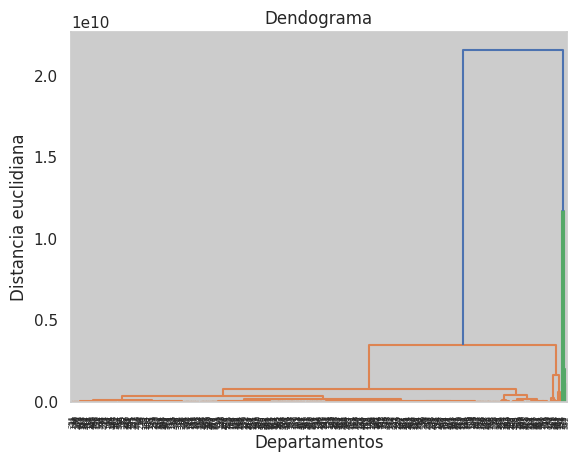

In [75]:
dist = pdist(dfCluster, metric='euclidean')
dfdend = dendrogram(linkage(dfCluster, method='ward'))
plt.title('Dendograma')
plt.xlabel('Departamentos')
plt.ylabel('Distancia euclidiana')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


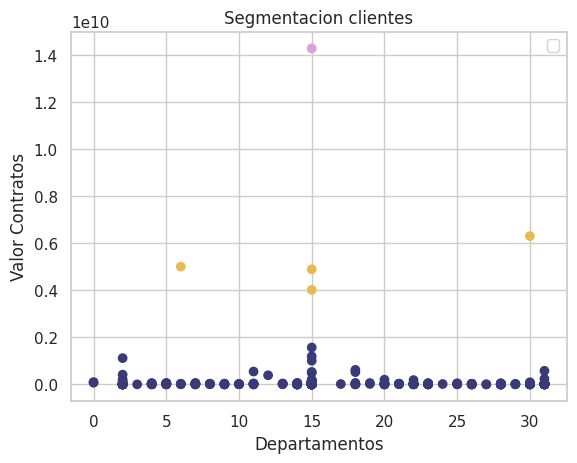

In [76]:
# Utilice este espacio para escribir el código.
#Realizamos el Clustering jerárquico aglomerativo
cluster_sk = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_sk =cluster_sk.fit_predict(dfCluster)

plt.scatter(dfCluster[:,0], dfCluster[:,1], c=cluster_sk, cmap='tab20b')
plt.title('Segmentacion clientes')
plt.xlabel('Departamentos')
plt.ylabel('Valor Contratos')
plt.legend()
plt.show()